# House Prices - Advanced Regression Techniques

> Goal
- To predict the sales price for each house. 
- For each Id in the test set, must predict the value of the SalePrice variable. 

> Metric
- Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.
- (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

> Data fields
- Here's a brief version of what you'll find in the data description file.
- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

# Feature Analysis
## Check
### module import

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

# 정규성 검정
from scipy.stats import norm
from scipy.stats import shapiro

#from sklearn.preprocessing import StandardScaler

# 변수 선택
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### read data (csv file)
> train : train.csv
- 1460 x 81

> test : test.csv
- 1459 x 80

In [115]:
train = pd.read_csv('project_data/train.csv')
test = pd.read_csv('project_data/test.csv')

In [116]:
# train에는 'SalePrice'가 있고, test에는 'SalePrice'가 없음.
train.shape, test.shape

((1460, 81), (1459, 80))

### check train data columns

In [117]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [242]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1453 non-null   int64  
 1   MSSubClass     1453 non-null   int64  
 2   MSZoning       1453 non-null   object 
 3   LotArea        1453 non-null   int64  
 4   Street         1453 non-null   object 
 5   Alley          1453 non-null   object 
 6   LotShape       1453 non-null   object 
 7   LandContour    1453 non-null   object 
 8   Utilities      1453 non-null   object 
 9   LotConfig      1453 non-null   object 
 10  LandSlope      1453 non-null   object 
 11  Neighborhood   1453 non-null   object 
 12  Condition1     1453 non-null   object 
 13  Condition2     1453 non-null   object 
 14  BldgType       1453 non-null   object 
 15  HouseStyle     1453 non-null   object 
 16  OverallQual    1453 non-null   int64  
 17  OverallCond    1453 non-null   int64  
 18  YearBuil

##  Dependent variable (종속 변수)
- train data를 사용해서 분석하고 나중에 모델링을 해 test data로 예측함.

### check distribution
> Dependent variable(종속변수) : 'SalePrice'
>> 결측값 없음.

>> histogram
- 정규분포와 비슷하지 않음.
- 한 쪽으로 치우쳐져 있음.
- 정점이 존재함.

>> boxplot
- boxplot 기준의 최댓값을 넘는 값들이 많음.
- 즉, '이상치'가 많음.
- 3사분위수까지는 낮은 값들이 많은 것 같음.
- 즉, 대부분 앞쪽에 분포되어 있음.

>> 왜도(skewness), 첨도(kurtosis)
- 왼쪽으로 치우쳐져 있고, 뾰족한 분포을 보임.
- 중심이 왼쪽에 있고, 중심에 데이터가 몰려있음.
- 그렇게 심하지는 않다고 생각.

In [119]:
print(train['SalePrice'].head())
print("\n")
print(train['SalePrice'].tail())

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, dtype: int64


In [120]:
# 결측값이 존재하지 않음
train['SalePrice'].isnull().sum()

0

In [121]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

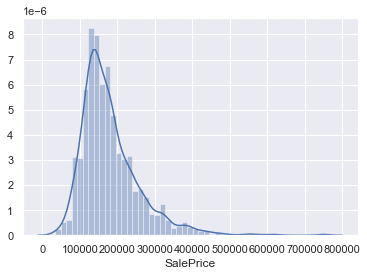

In [122]:
SalePrice_hist = sns.distplot(train['SalePrice'])

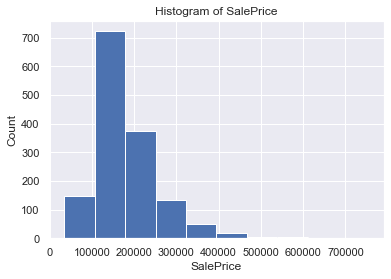

In [123]:
fig, ax = plt.subplots()
fig = train['SalePrice'].hist(ax = ax)
plt.title('Histogram of SalePrice')
plt.ylabel('Count')
plt.xlabel('SalePrice')
plt.show()

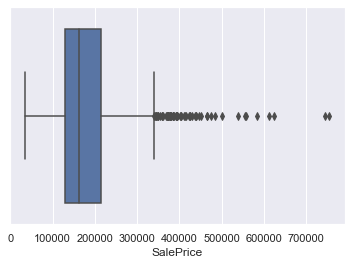

In [124]:
SalePrice_boxplot = sns.boxplot('SalePrice', data = train)

In [125]:
# skewness and kurtosis
# skewness(왜도) : 절댓값 3미만이면 치우침의 정도가 크지 않다고 판단
# kurtosis(첨도) : 절댓값 10미만이면 괜찮다고 판단
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### check assumption

#### normality
> 정규분포가 아닌 것으로 보임.

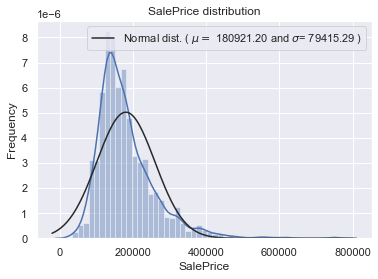

In [126]:
# 정규분포 곡선 그리기
sns.distplot(train['SalePrice'], fit = norm) 
(mu, sigma) = norm.fit(train['SalePrice'])

plt.title('SalePrice distribution')
plt.ylabel('Frequency')
plt.legend(['Normal dist. ( $\mu=$ {:.2f} and $\sigma$= {:.2f} )'.format(mu, sigma)],
           loc='best')
plt.show()

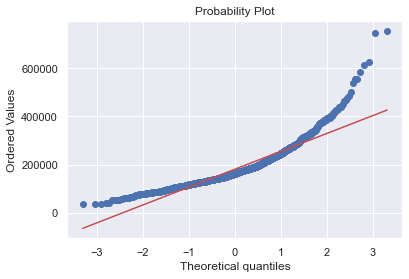

In [127]:
# QQ plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot = plt)
plt.show()

In [128]:
# shapiro test
stat, p = shapiro(train['SalePrice'])

# interpret
alpha = 0.05
if p > alpha:
    print('p : ', p, '\t SalePrice looks Gaussian (fail to reject H0)')
else:
    print('p : ', p, '\t SalePrice does not look Gaussian (reject H0)')

p :  3.206247534576162e-33 	 SalePrice does not look Gaussian (reject H0)


### transformation
> Log-transformation

In [129]:
# 로그 변환 시 주의점! (0 과 1 사이의 값은 -무한~0 의 값이기 때문에 
# 모든 수에 1을 더해주고 로그를 취해줌 => np.log1p

df = pd.concat([train['SalePrice'],  np.log(train['SalePrice'] + 1).rename('LogSalePrice')], axis=1, names=['SalePrice', 'LogSalePrice'])
df.head()

SalePrice  LogSalePrice
0     208500     12.247699
1     181500     12.109016
2     223500     12.317171
3     140000     11.849405
4     250000     12.429220

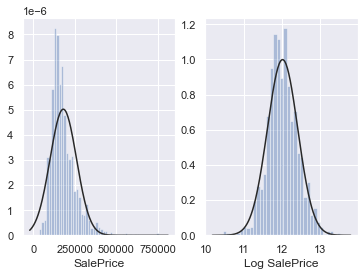

In [130]:
plt.subplot(1, 2, 1)
sns.distplot(train['SalePrice'], kde=False, fit = norm)

plt.subplot(1, 2, 2)
sns.distplot(np.log(train['SalePrice'] + 1), kde=False, fit = norm)
plt.xlabel('Log SalePrice')
plt.show()

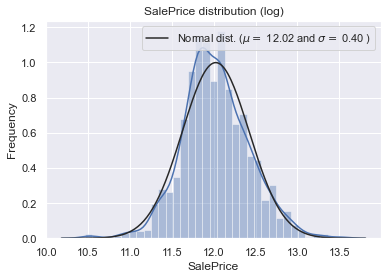

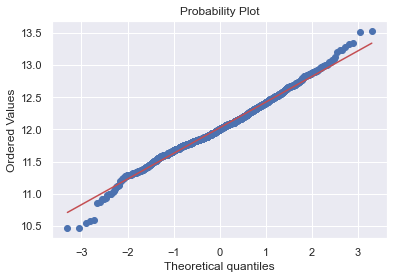

In [131]:
# log-transformationed data
SalePrice_log = np.log1p(train['SalePrice'])

sns.distplot(np.log(train['SalePrice'] + 1), fit=norm)
(mu, sigma) = norm.fit(np.log(train['SalePrice'] + 1))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'
            .format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution (log)')

fig = plt.figure()
res = stats.probplot(np.log(train['SalePrice'] + 1), plot = plt)
plt.show()

## Independent variables(독립변수)
### numerical & categorical 
> Independent variable types
- categorical : 43
- numerical : 38

- object : 43
- int64 : 35
- float64 : 3

In [132]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [133]:
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [134]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [135]:
train_numerical = train.dtypes[train.dtypes != "object"].index.copy()
print("Number of Numerical features: ", len(train_numerical))

train_categorical = train.dtypes[train.dtypes == "object"].index.copy()
print("Number of Categorical features: ", len(train_categorical))
# 수치형 38 = 정수형 35 + 실수형 3

Number of Numerical features:  38
Number of Categorical features:  43


In [136]:
# 중복 피하기 위해서 set 사용
train_numerical = set(train_numerical)
train_numerical

{'1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Id',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold'}

In [137]:
train_categorical = set(train_categorical)
train_categorical

{'Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

### numerical
#### discrete / continuous
> Numerical Feature : discrete(이산형) / continuous(연속형) 분리
- 1차원적으로 정수형은 이산형, 실수형은 연속형으로 분리할 수 있다.
- 하지만 실수형 변수에서도 특정 값만 반복되는 이산형 특성을 지닐 수 있다.
- 그리고 정수형 데이터 중에서도 각 수치간의 관계가 없는 범주형 특성을 띨 수도 있다.

> 0
- BsmtFinSF2 : 거의 0 (Type 2 finished square feet)
- LowQualFinSF : 다 0 (Low quality finished square feet (all floors))
- 3SsnPorch : 다 0 (Three season porch area in square feet)
- EnclosedPorch : 거의 0 (Enclosed porch area in square feet)
- MiscVal : 다 0 (Value(dollars) of miscellaneous feature)
- PoolArea : 다 0 (Pool area in square feet)
- ScreenPorch : 거의 0 (Screen porch area in square feet)

> 예외
- ID : 순서 (1 ~ 1460)

In [138]:
# 종속변수인 'SalePrice'와 순서를 나타내는 'Id' 제외하고 생각
train_numerical.remove('SalePrice')
train_numerical.remove('Id')

In [139]:
len(train_numerical)

36

In [239]:
# 산점도 그래프 그리는 함수
# 종속변수 SalePrice 와 독립변수간의 산점도 그래프 그리기

def drawing_scatterplots(features):
    num_of_features = len(features)
    num_col = 3
    fig, ax = plt.subplots(ncols=num_col,
                           nrows=int(num_of_features/num_col)+1,
                           constrained_layout=True)
    fig.set_size_inches(20,30)
    
    for i,feature in enumerate(features):
        ax_row = int(i/num_col)
        ax_col = i%num_col
        sns.scatterplot(x=train[feature], 
                        y=train['SalePrice'], 
                        ax=ax[ax_row][ax_col])
        ax[ax_row][ax_col].set(title=feature)
        
    return fig

34


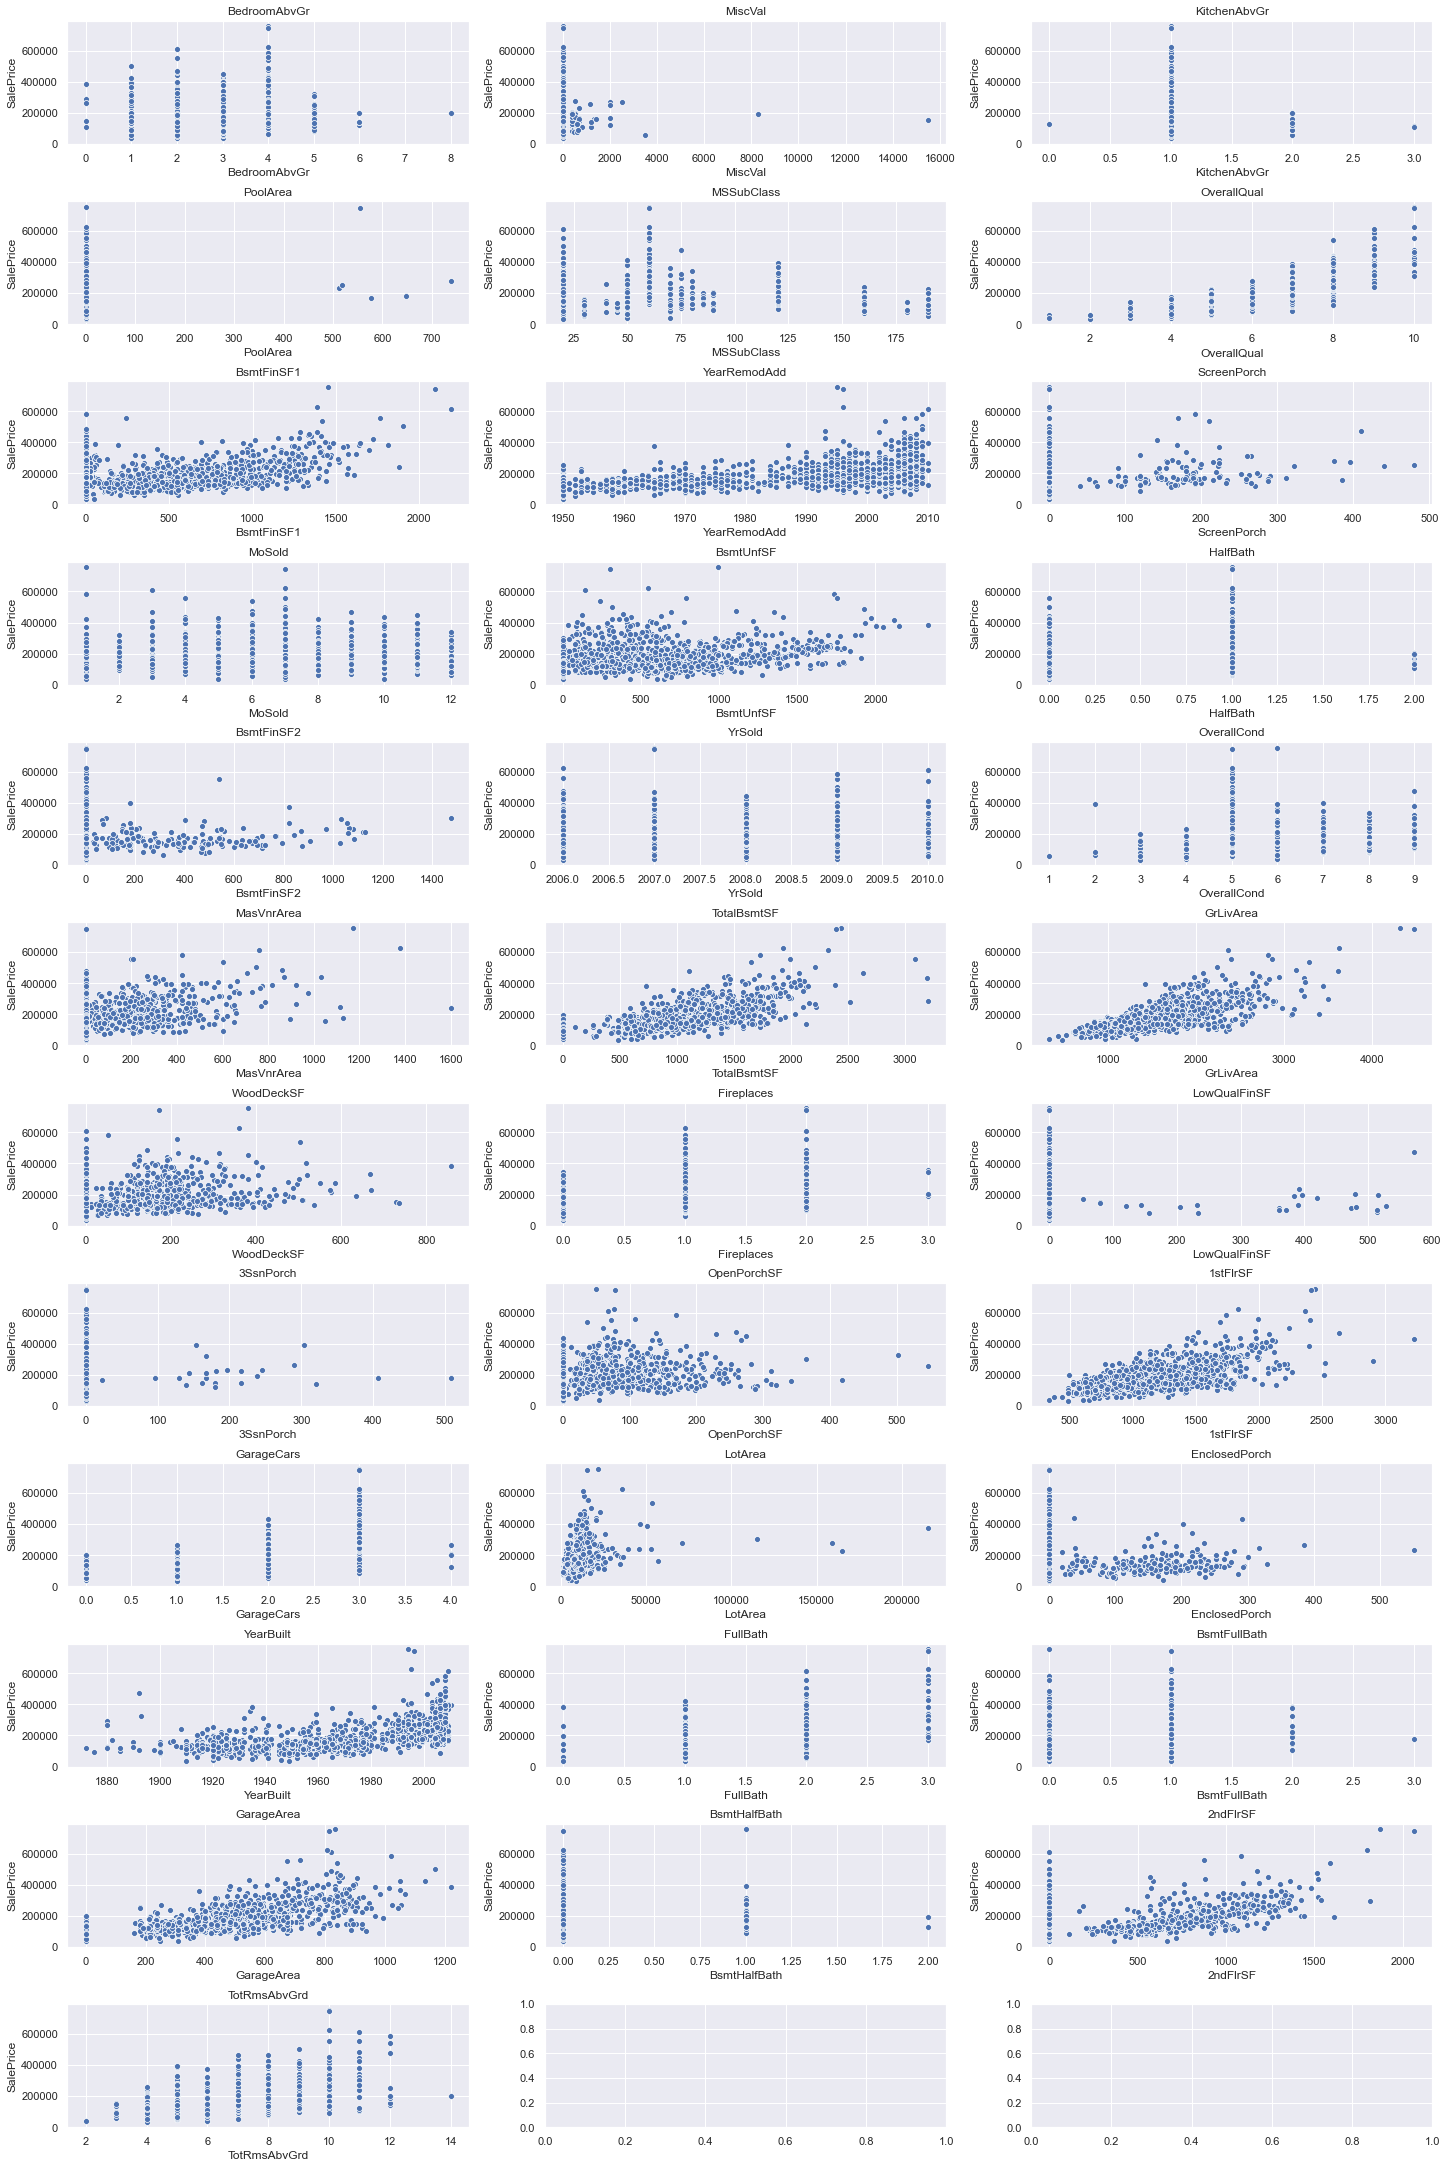

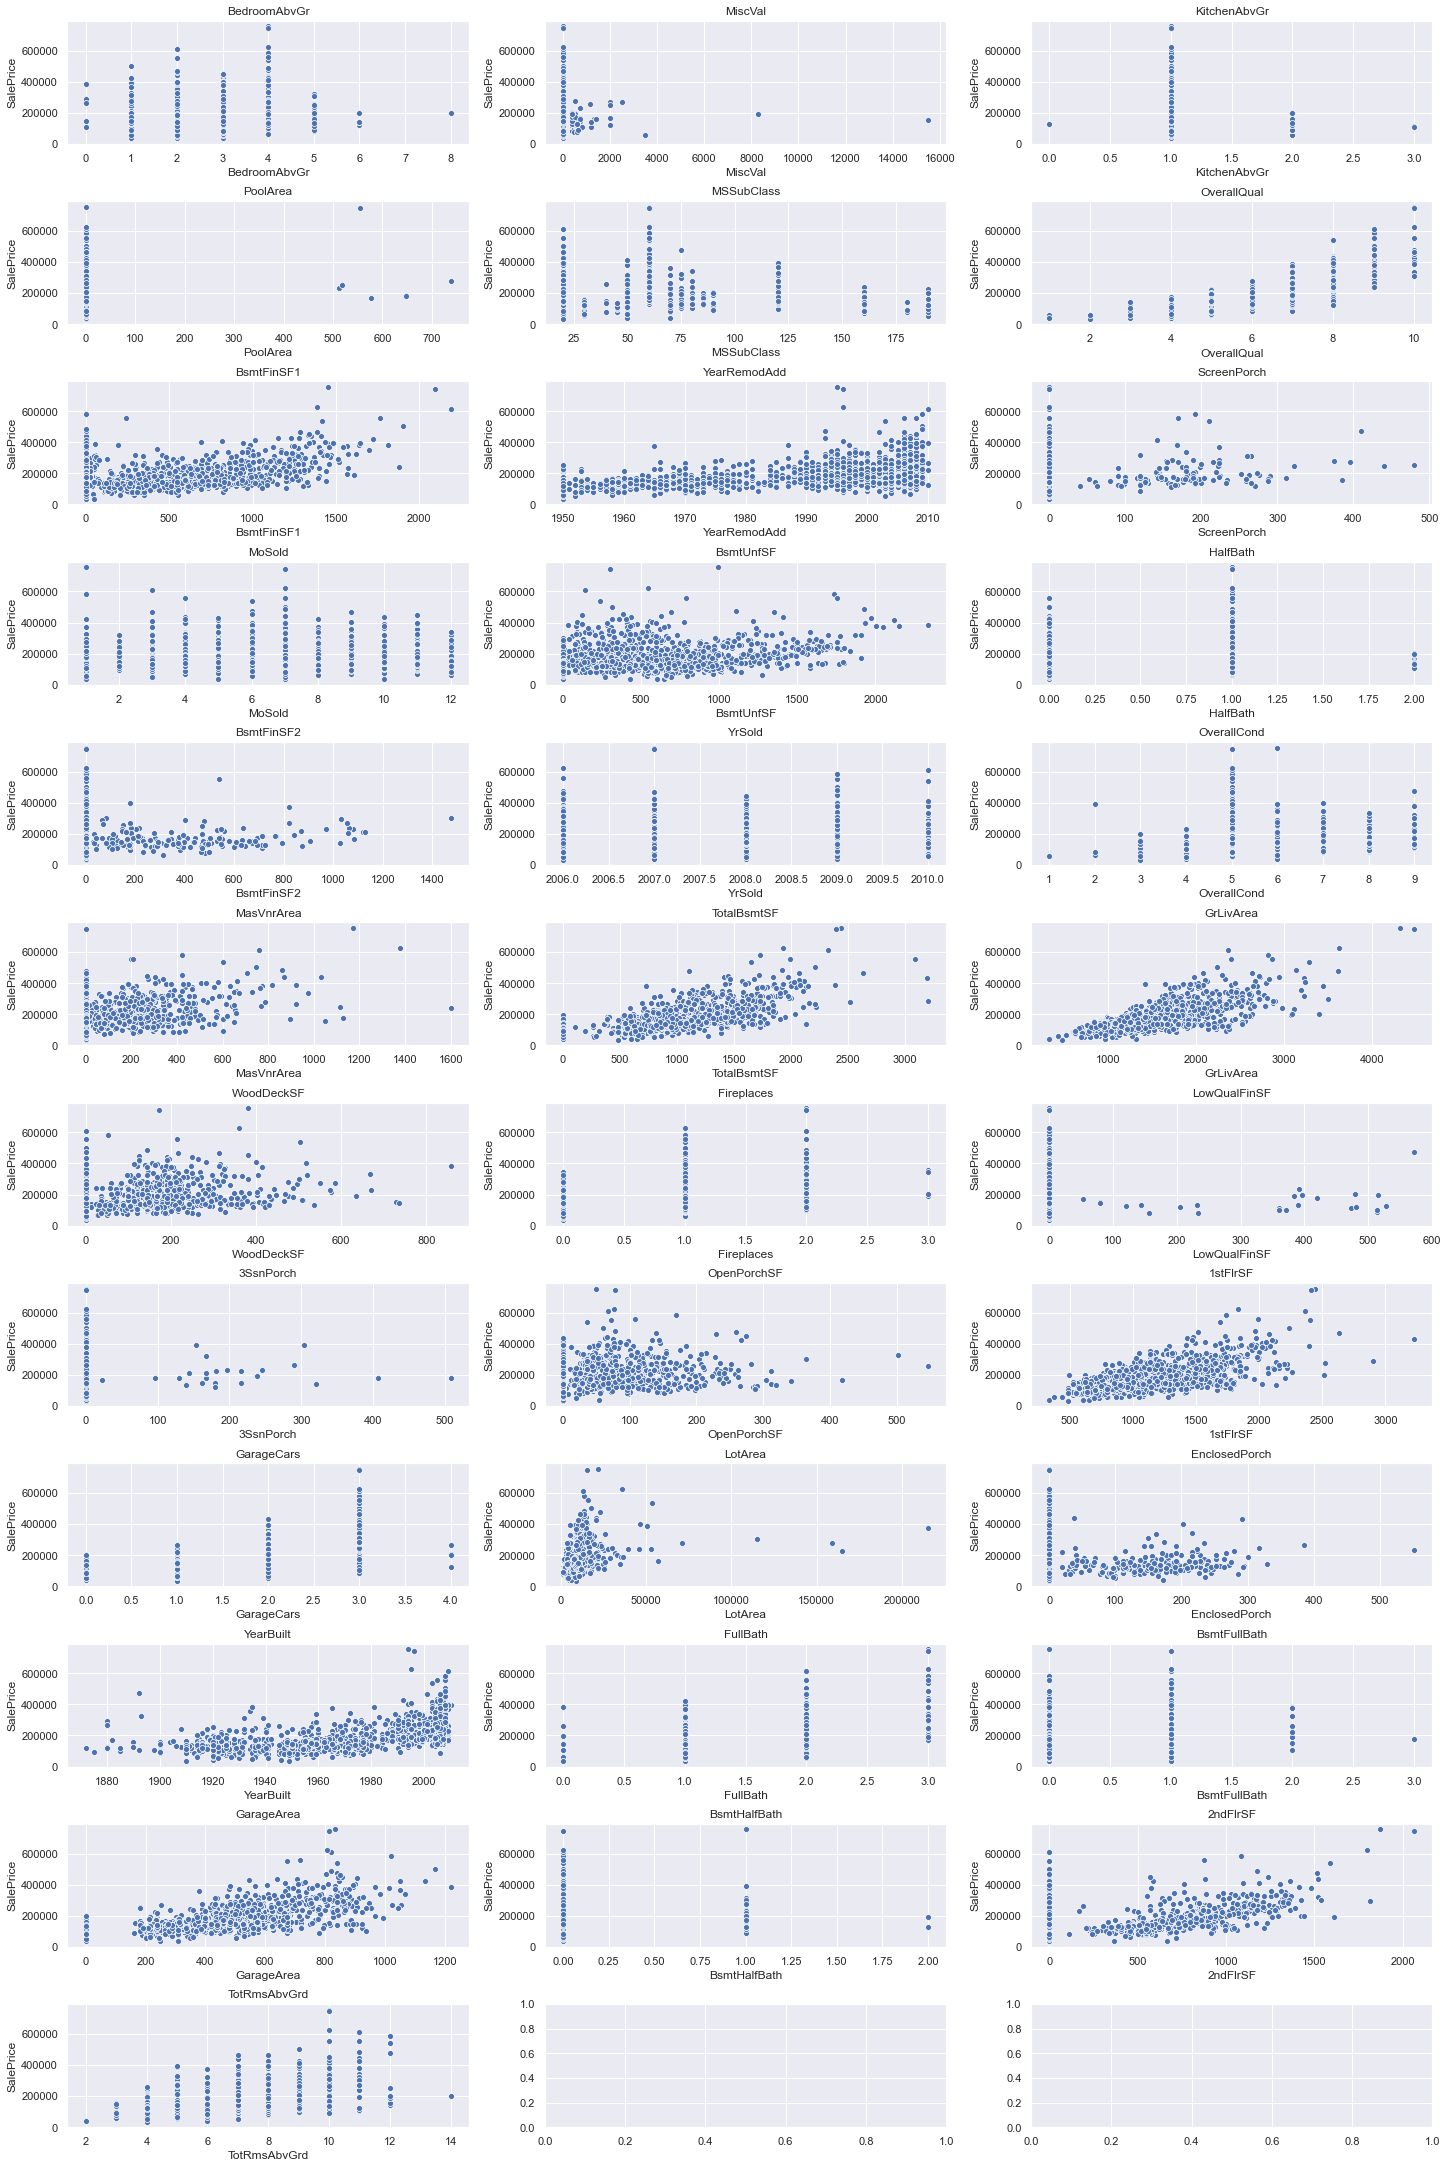

In [240]:
# scatterplot of numerical features 
drawing_scatterplots(train_numerical)

In [142]:
# 산점도를 통해 discrete feature 분리 
train_discrete = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 
                  'BsmtHalfBath', 'HalfBath', 'FullBath', 'BedroomAbvGr', 
                  'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                  'MoSold', 'YrSold', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd']

# 중복 값 방지를 위해 set (집합 자료형 사용)
train_discrete = set(train_discrete).copy()

train_continuous = set(train_numerical)-train_discrete

In [143]:
# 'SalePrice', 'Id' 제외
print("len(train_numerical) : ", len(train_numerical))
print("len(train_discrete) : ", len(train_discrete))
print("len(train_continuous) : ", len(train_continuous))

len(train_numerical) :  36
len(train_discrete) :  17
len(train_continuous) :  19


#### continuous (연속형)
> regplot (scatter plot & line plot)
- 산점도와 회귀직선을 통해 목적변수와 변수 간의 유의미한 관계를 추측

> distribution
- 연속형 독립변수의 대략적인 분포 확인

In [144]:
# RegPlot

def drawing_regplots(features):
    num_of_features = len(features)
    num_col = 3
    fig, ax = plt.subplots(ncols=num_col,
                           nrows=int(num_of_features/num_col)+1,
                           constrained_layout=True)
    fig.set_size_inches(20,30)
    
    for i,feature in enumerate(features):
        ax_row = int(i/num_col)
        ax_col = i%num_col
        sns.regplot(data=train, x=feature, y='SalePrice', ax=ax[ax_row][i%num_col])
        ax[ax_row][ax_col].set(title=feature)
            
    return fig

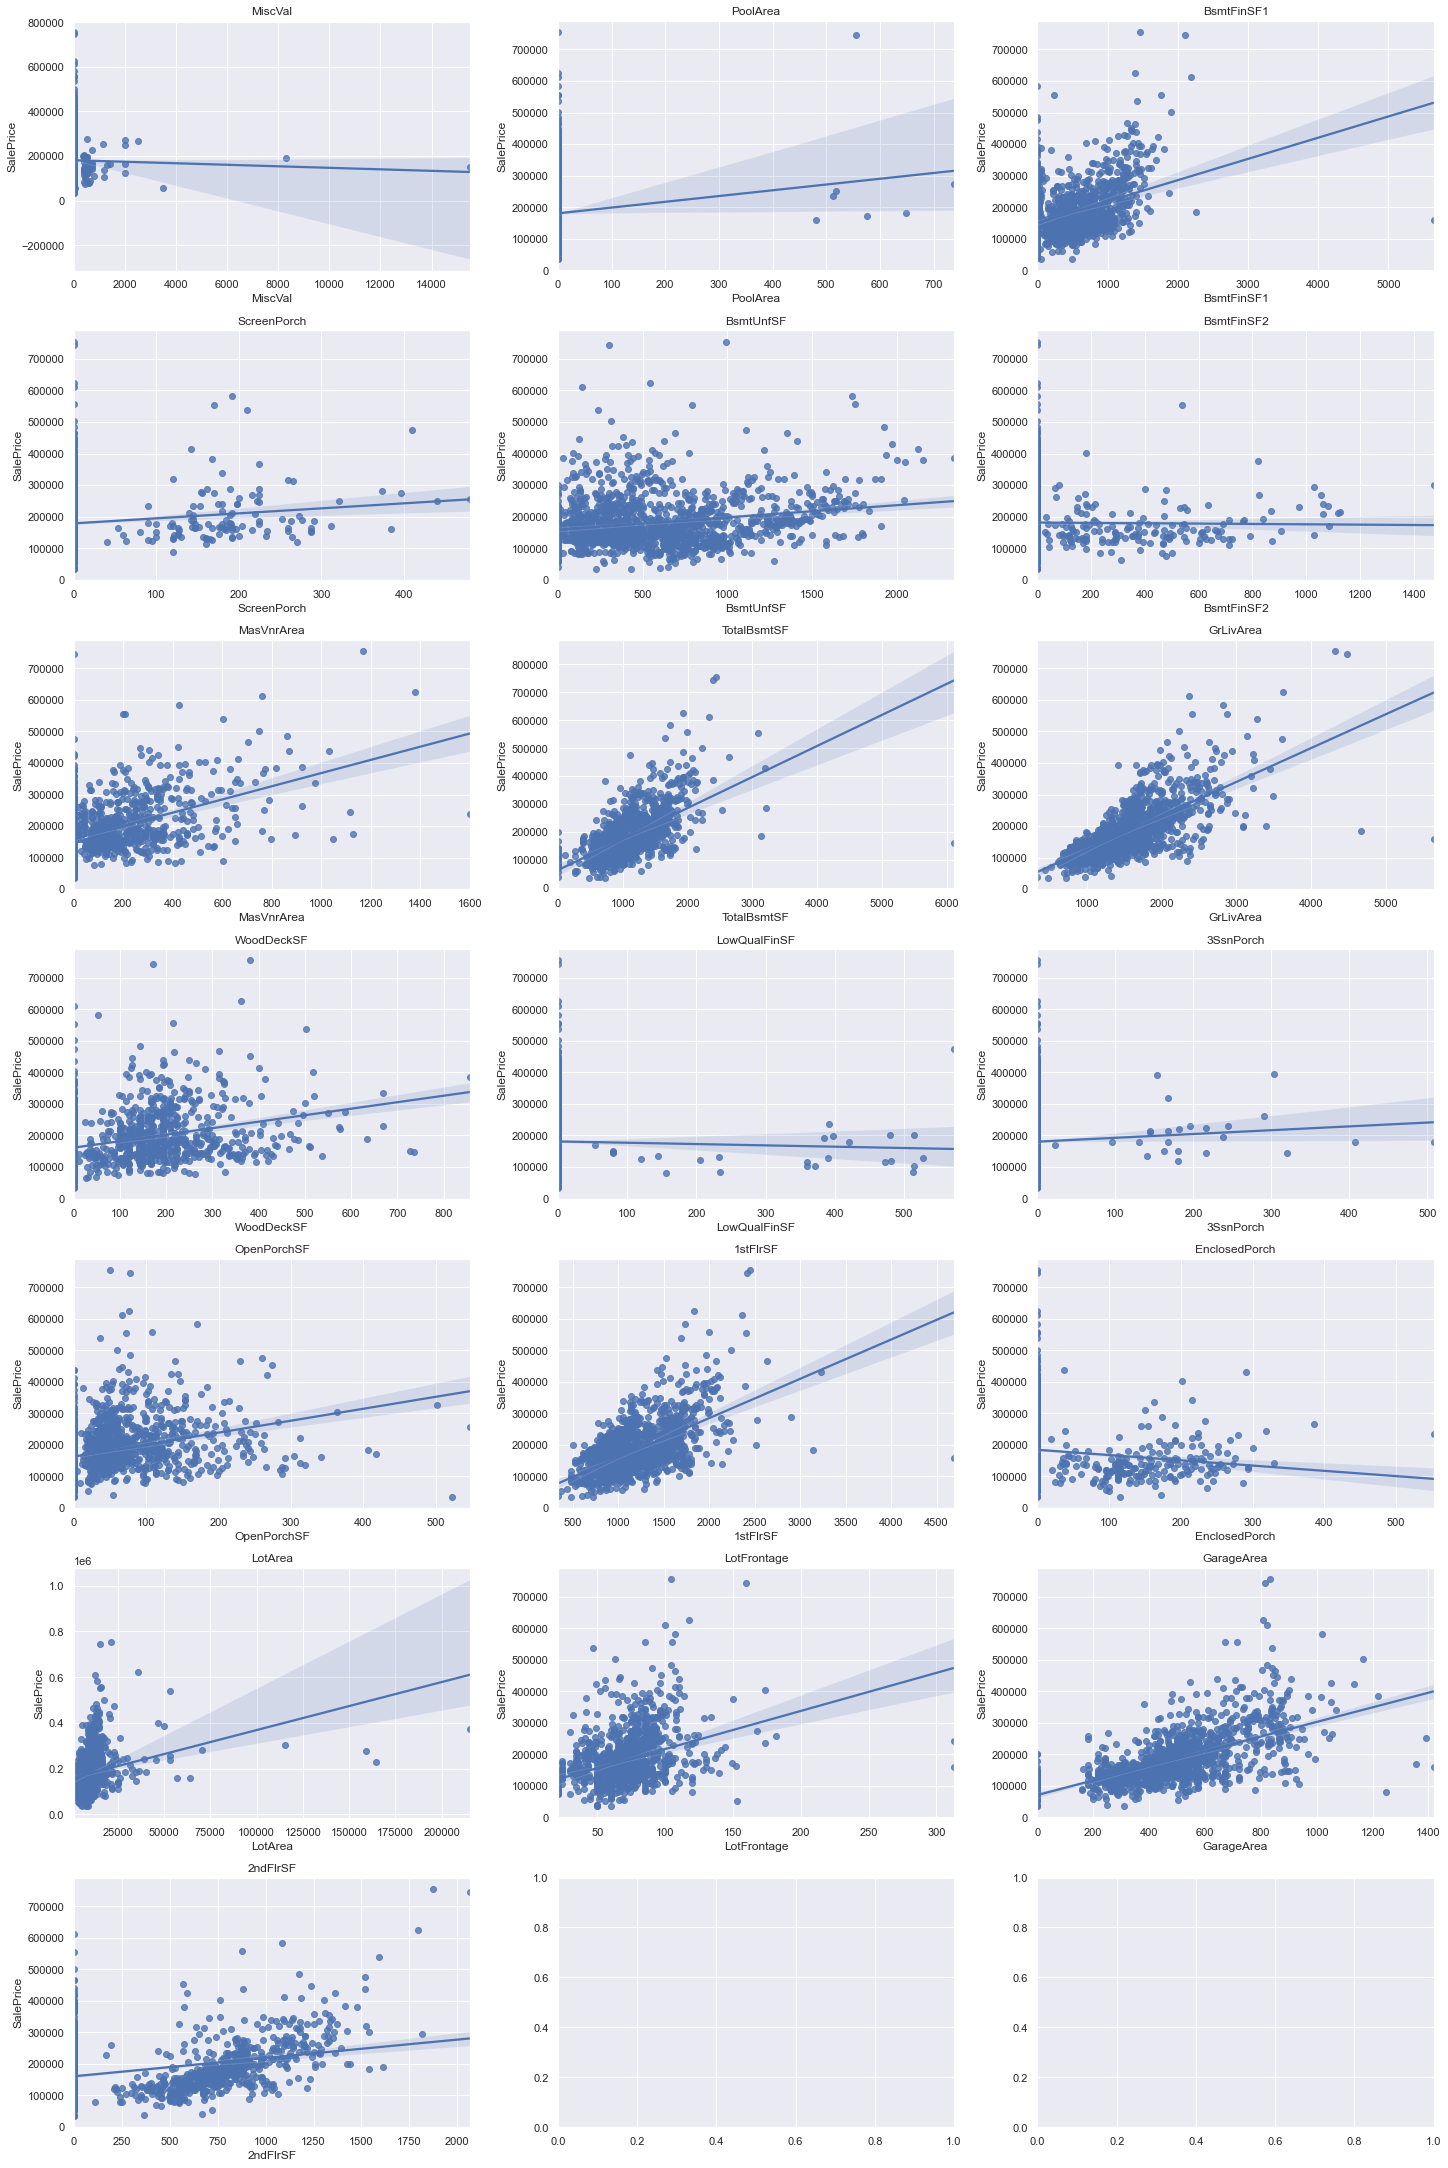

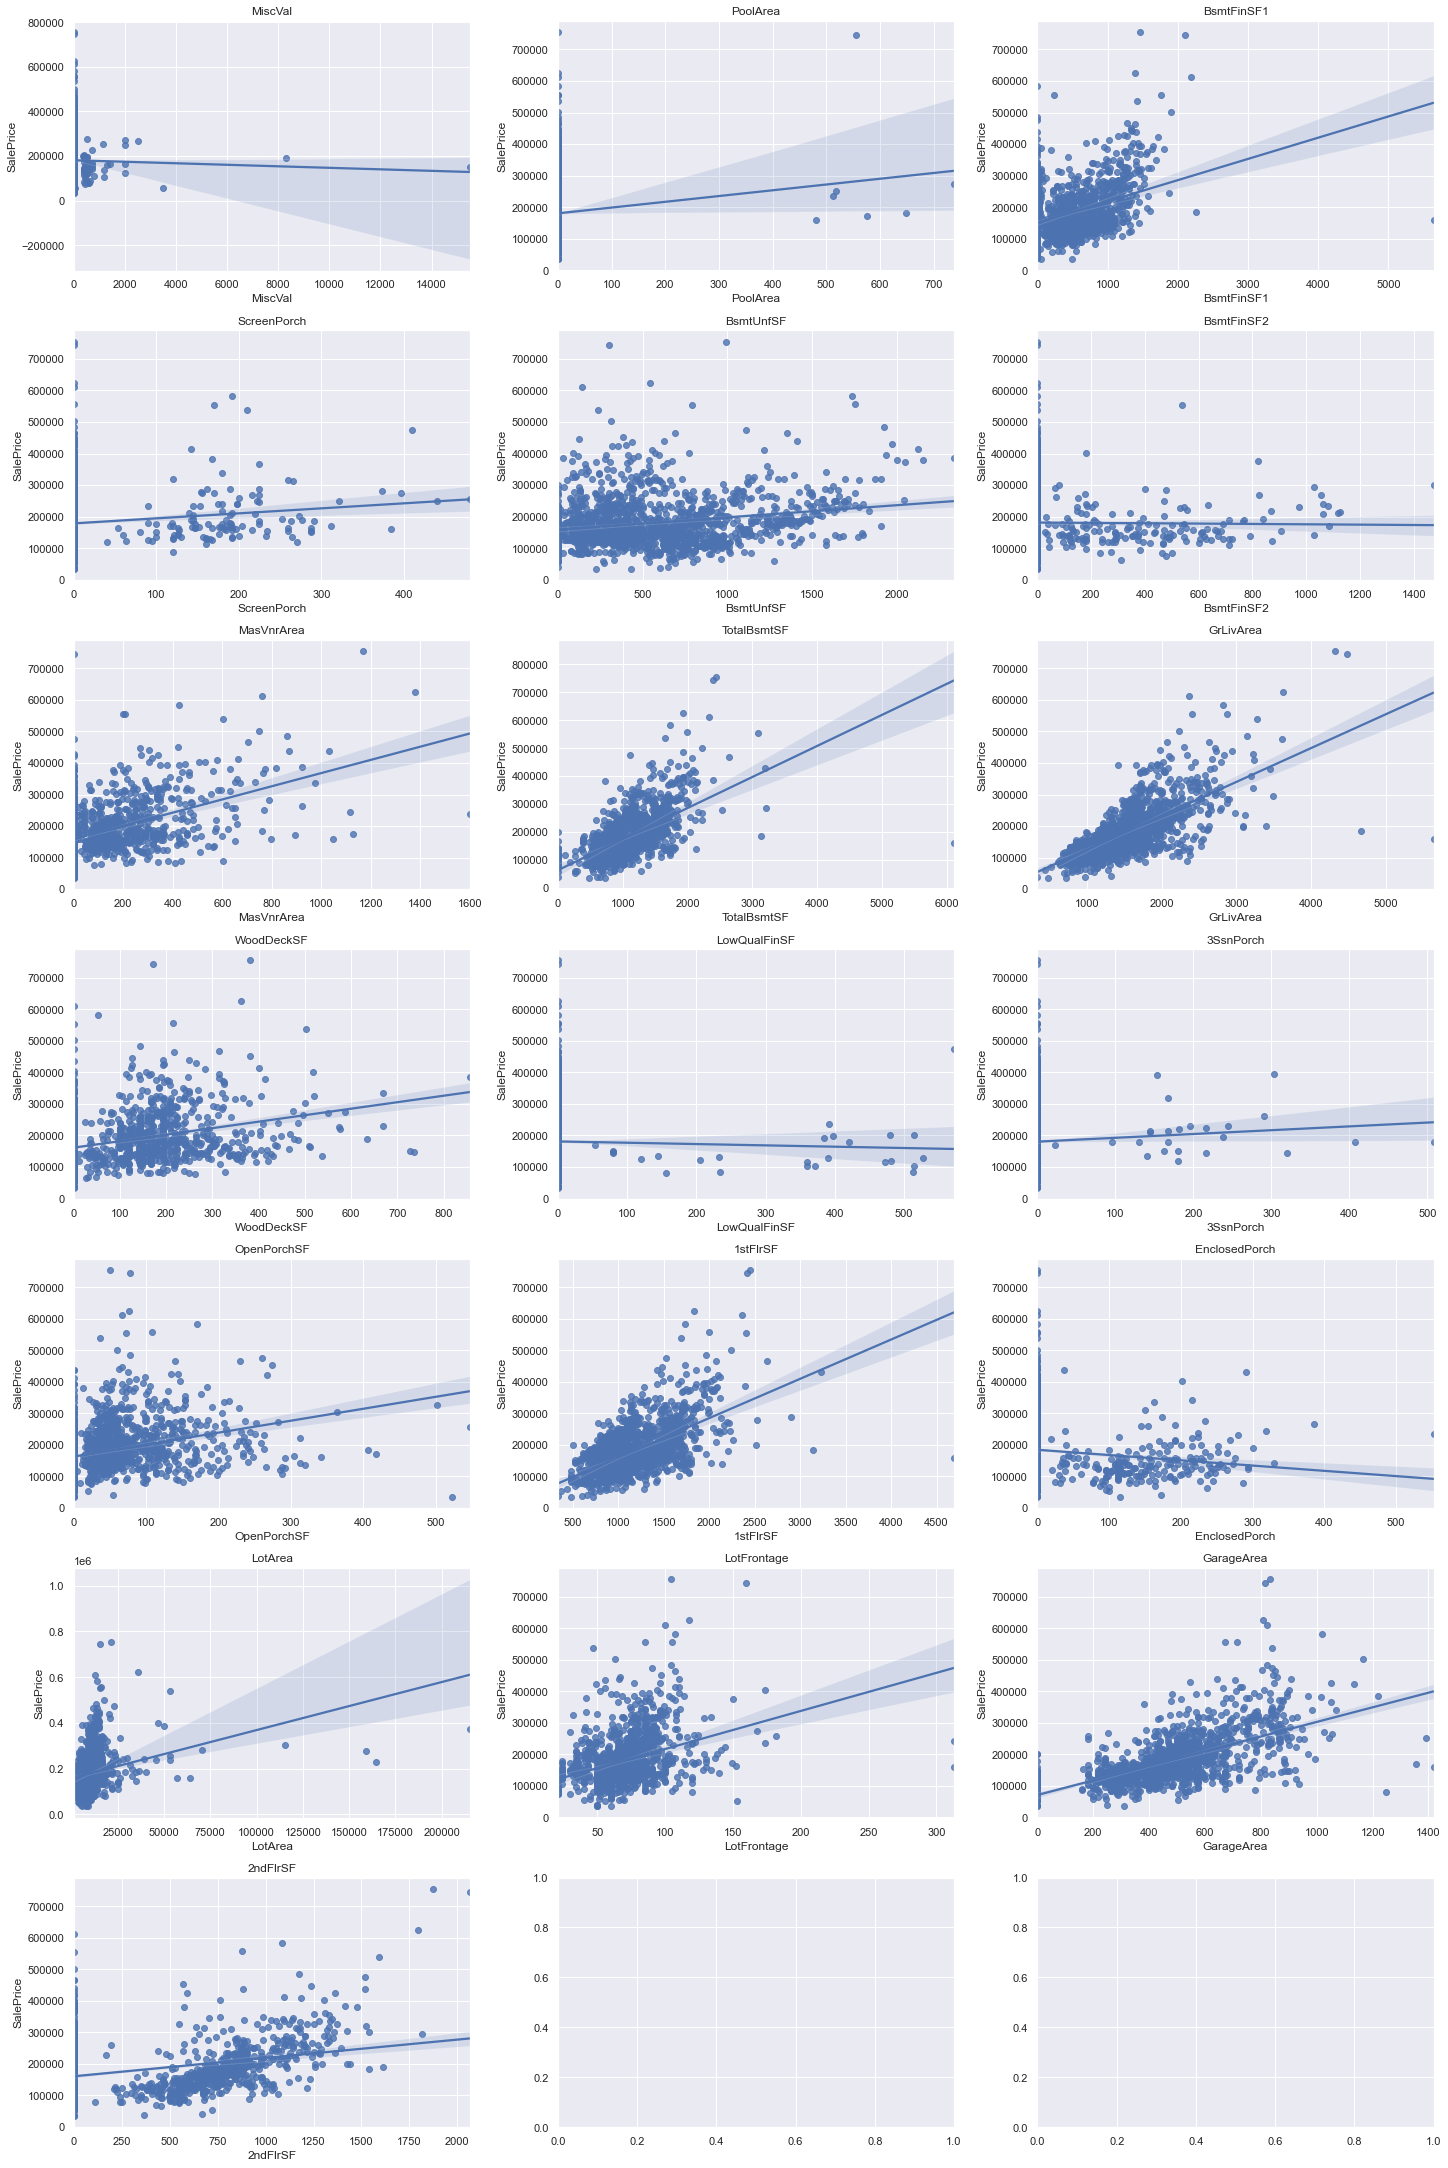

In [145]:
drawing_regplots(train_continuous)

In [146]:
# DistPlot

def drawing_distplots(features):
    num_of_features = len(features)
    num_col = 3
    fig, ax = plt.subplots(ncols=num_col,
                           nrows=int(num_of_features/num_col)+1,
                           constrained_layout=True)
    fig.set_size_inches(20,30)
    
    for i,feature in enumerate(features):
        ax_row=int(i/num_col)
        ax_col=i%num_col
        sns.distplot(train[feature], ax=ax[ax_row][i%num_col], fit=norm)
        ax[ax_row][ax_col].set(title=feature)
            
    return fig

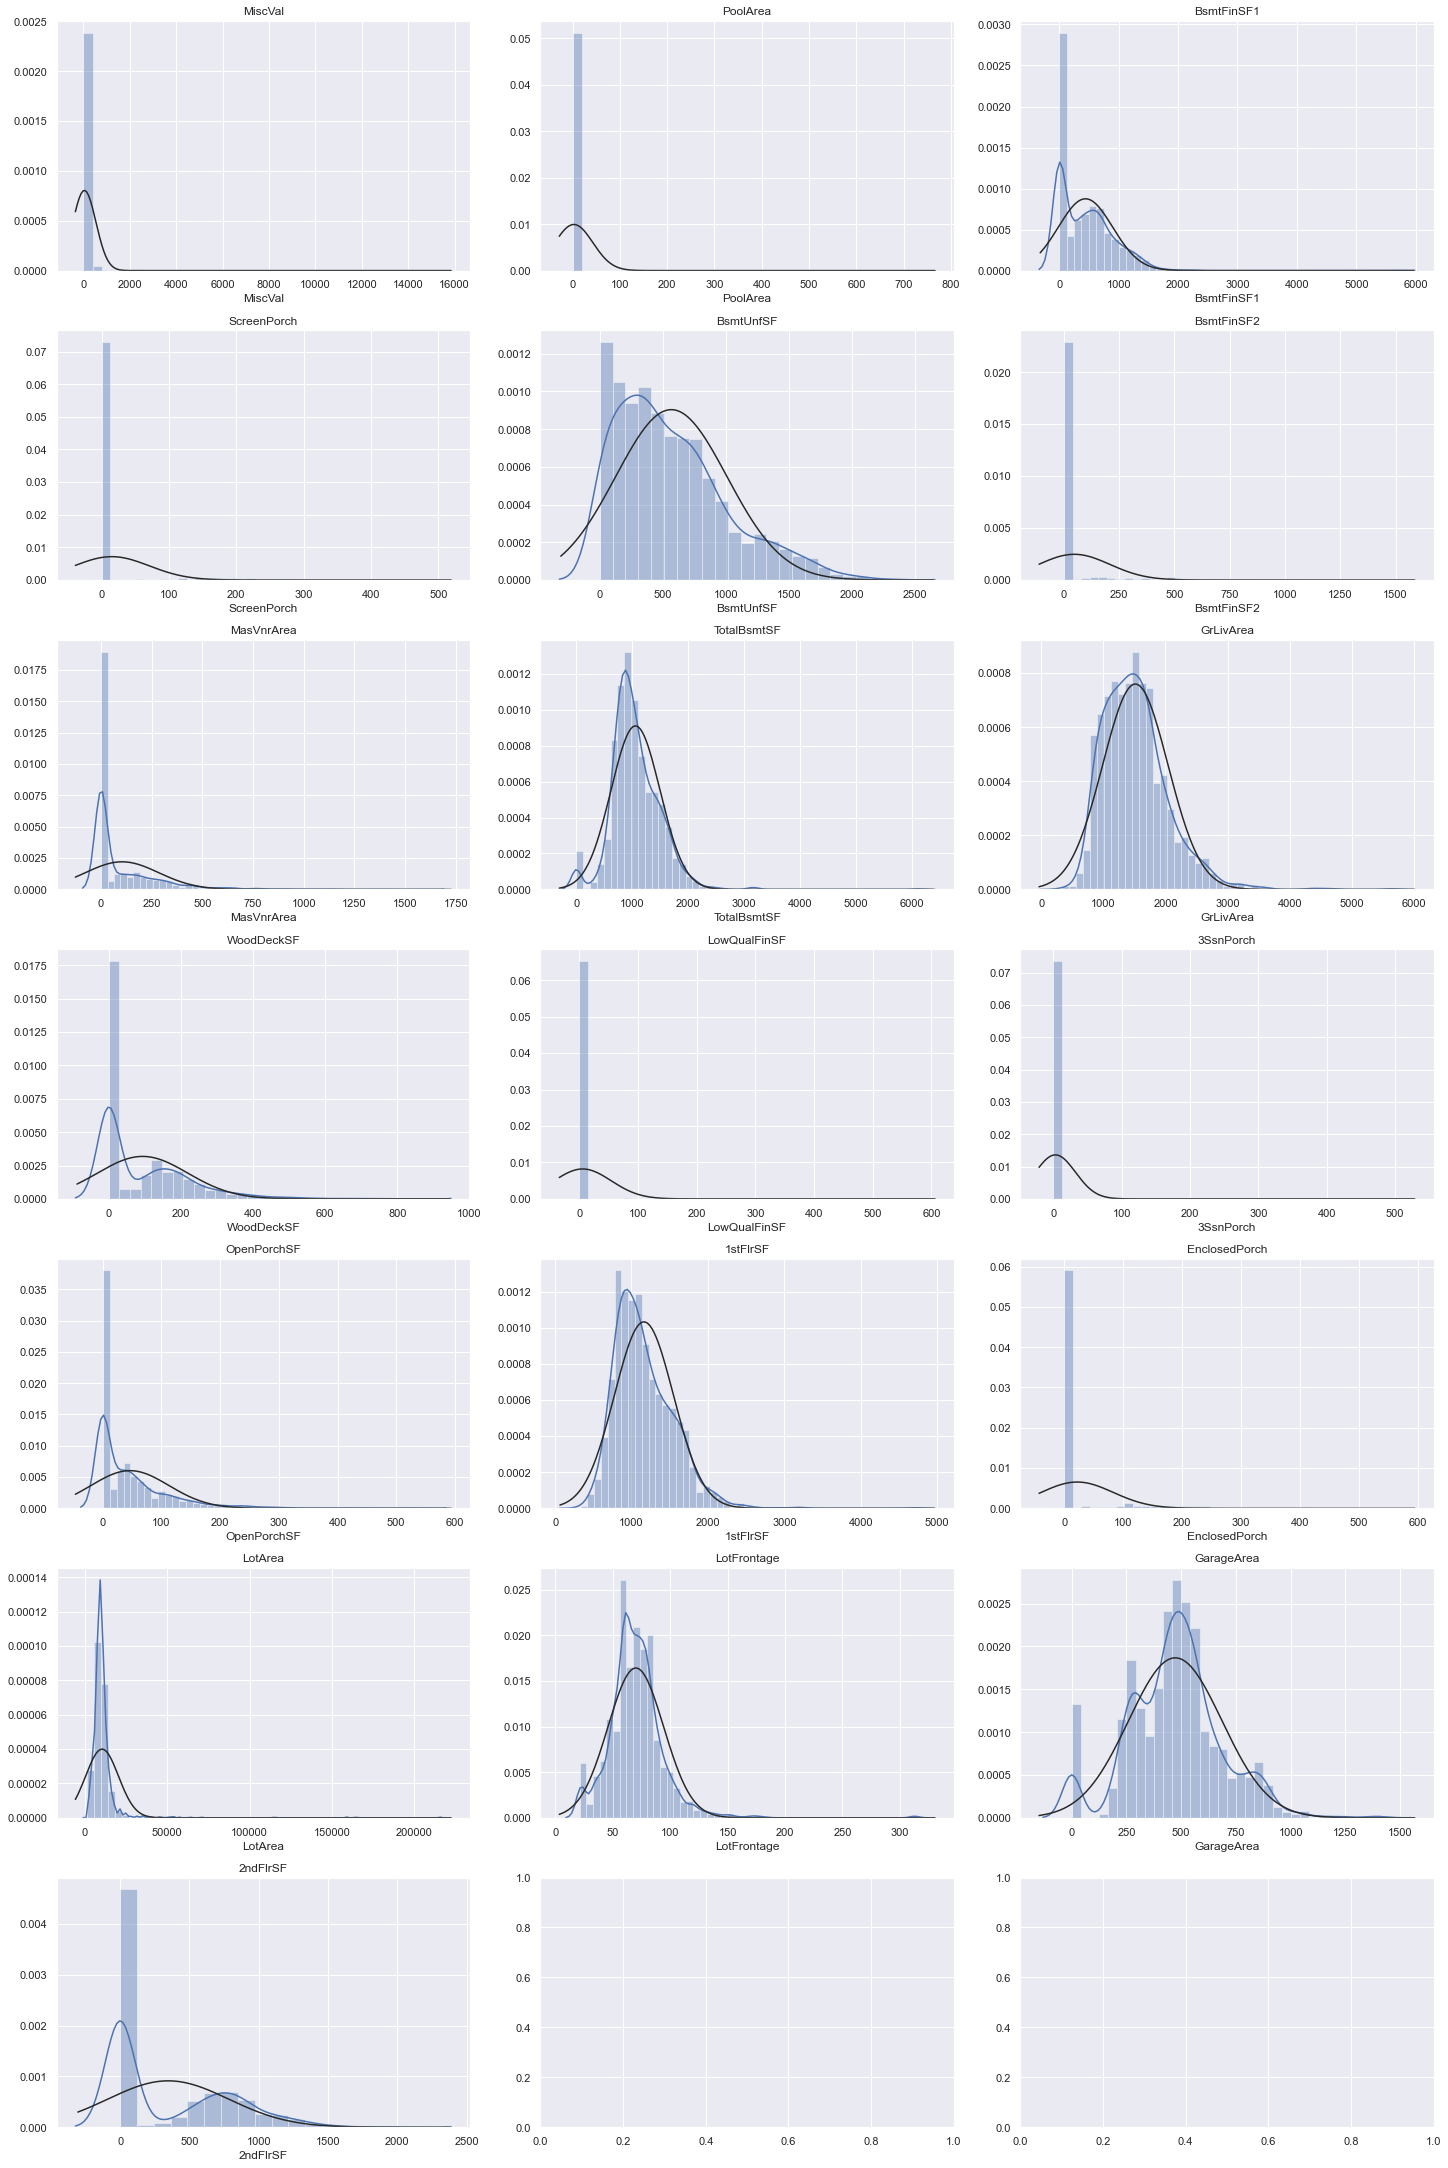

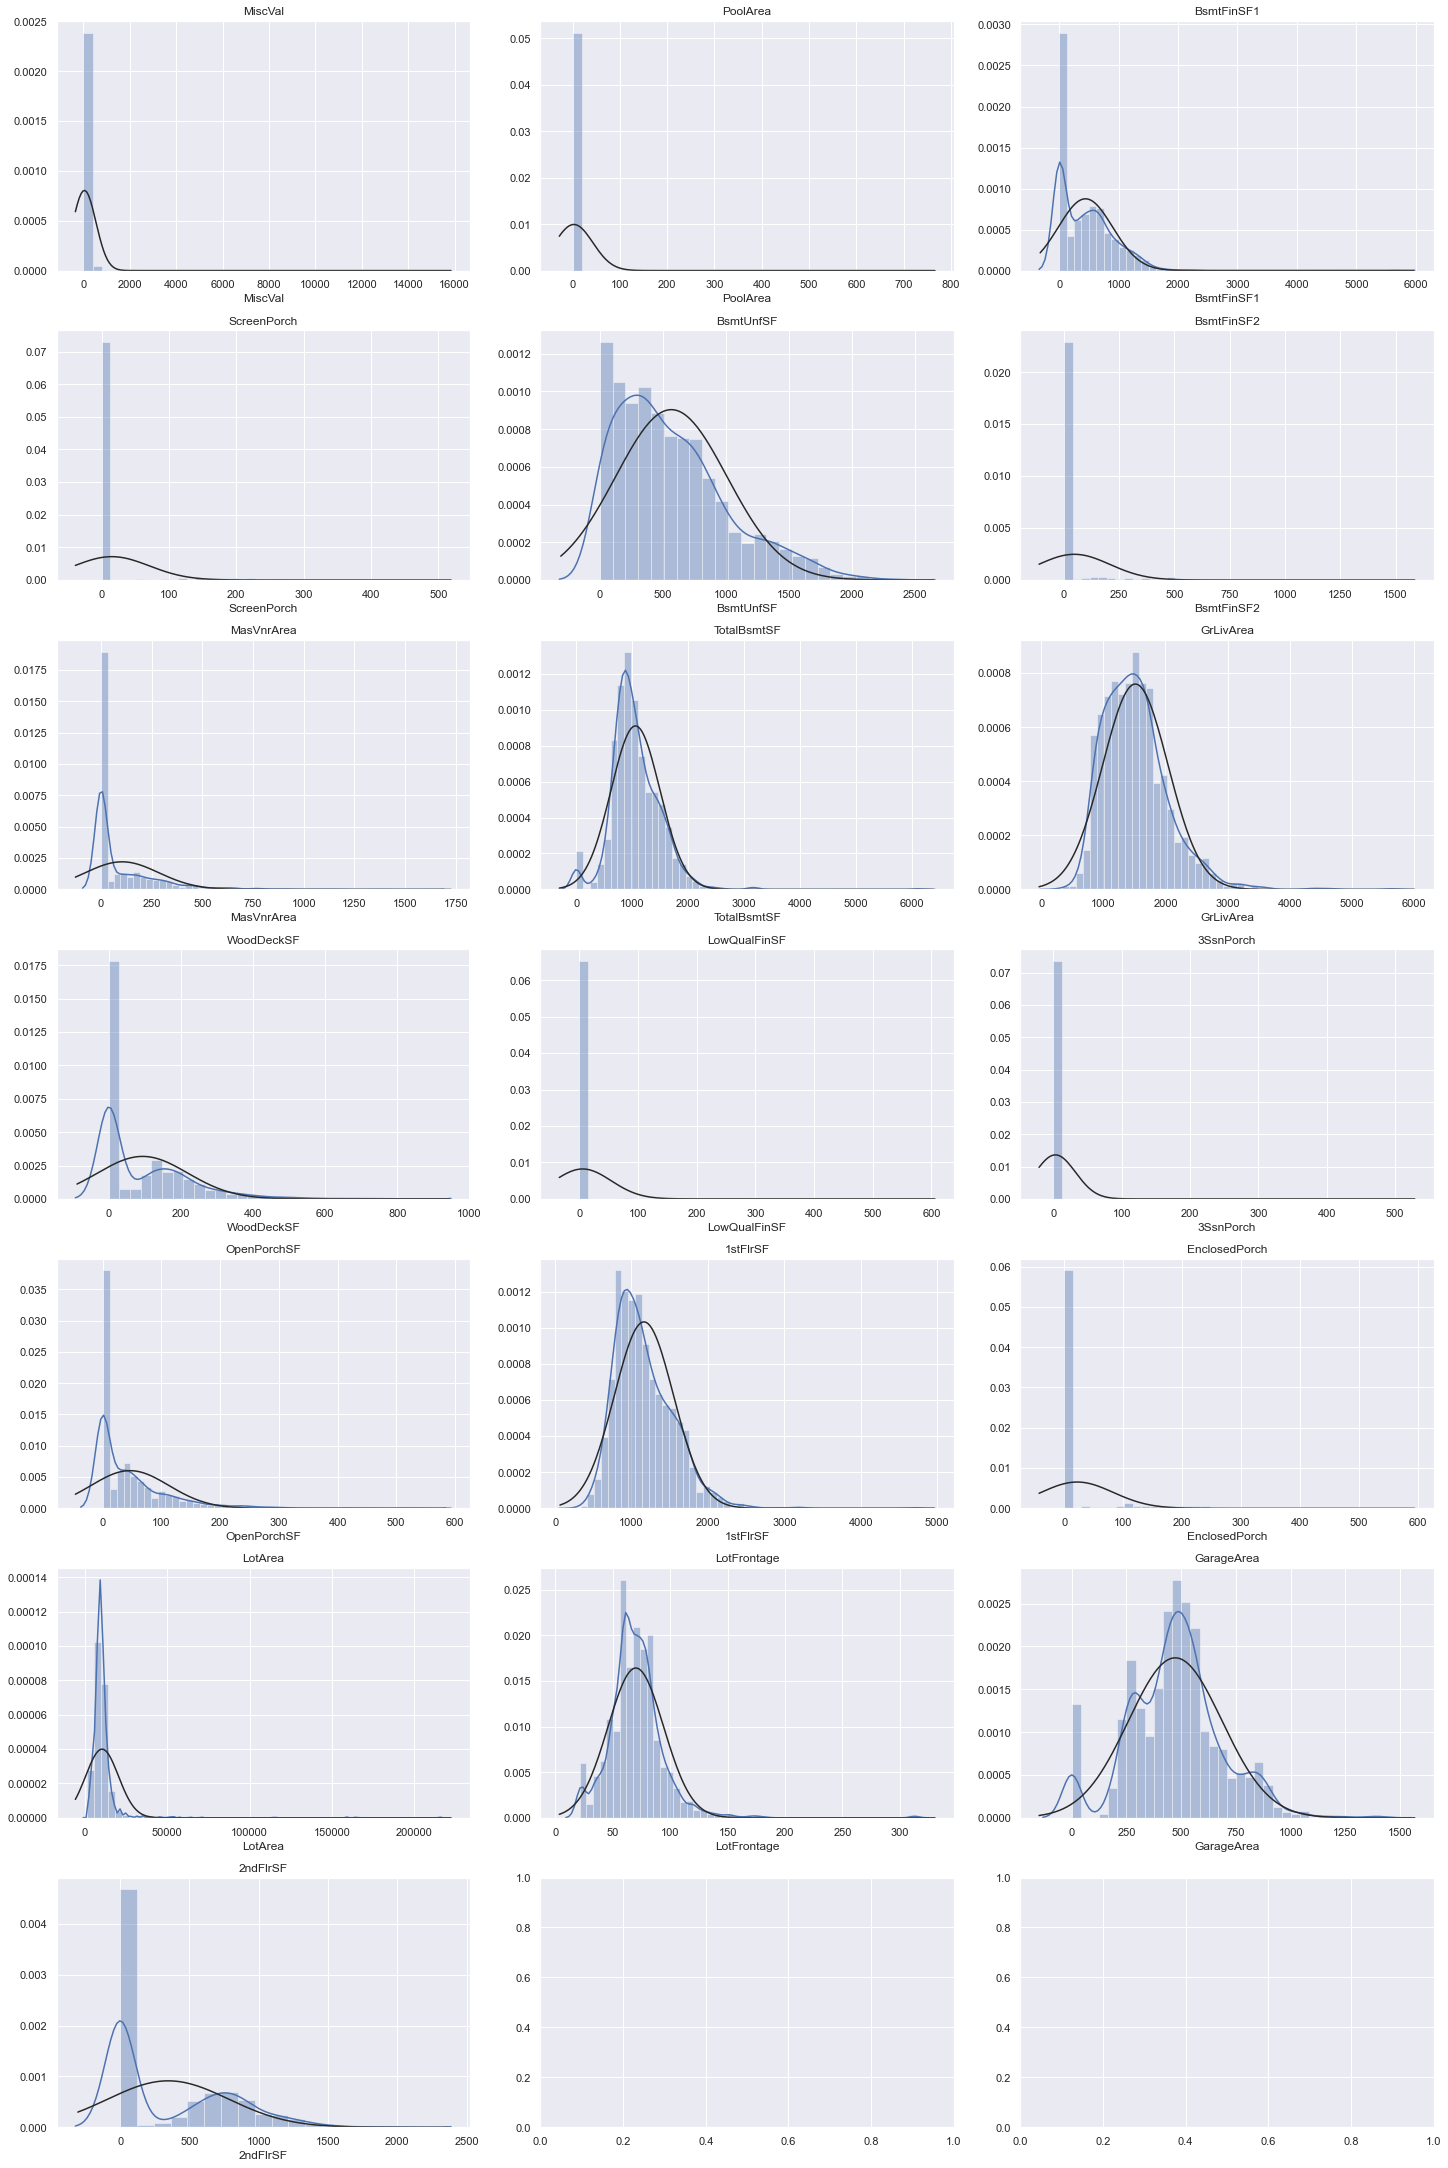

In [147]:
sns.set(style = 'darkgrid')
drawing_distplots(train_continuous)

#### discrete (이산형)
> RegPlot
- 산점도와 회귀직선을 통해 목적변수와 변수 간의 유의미한 관계를 추측

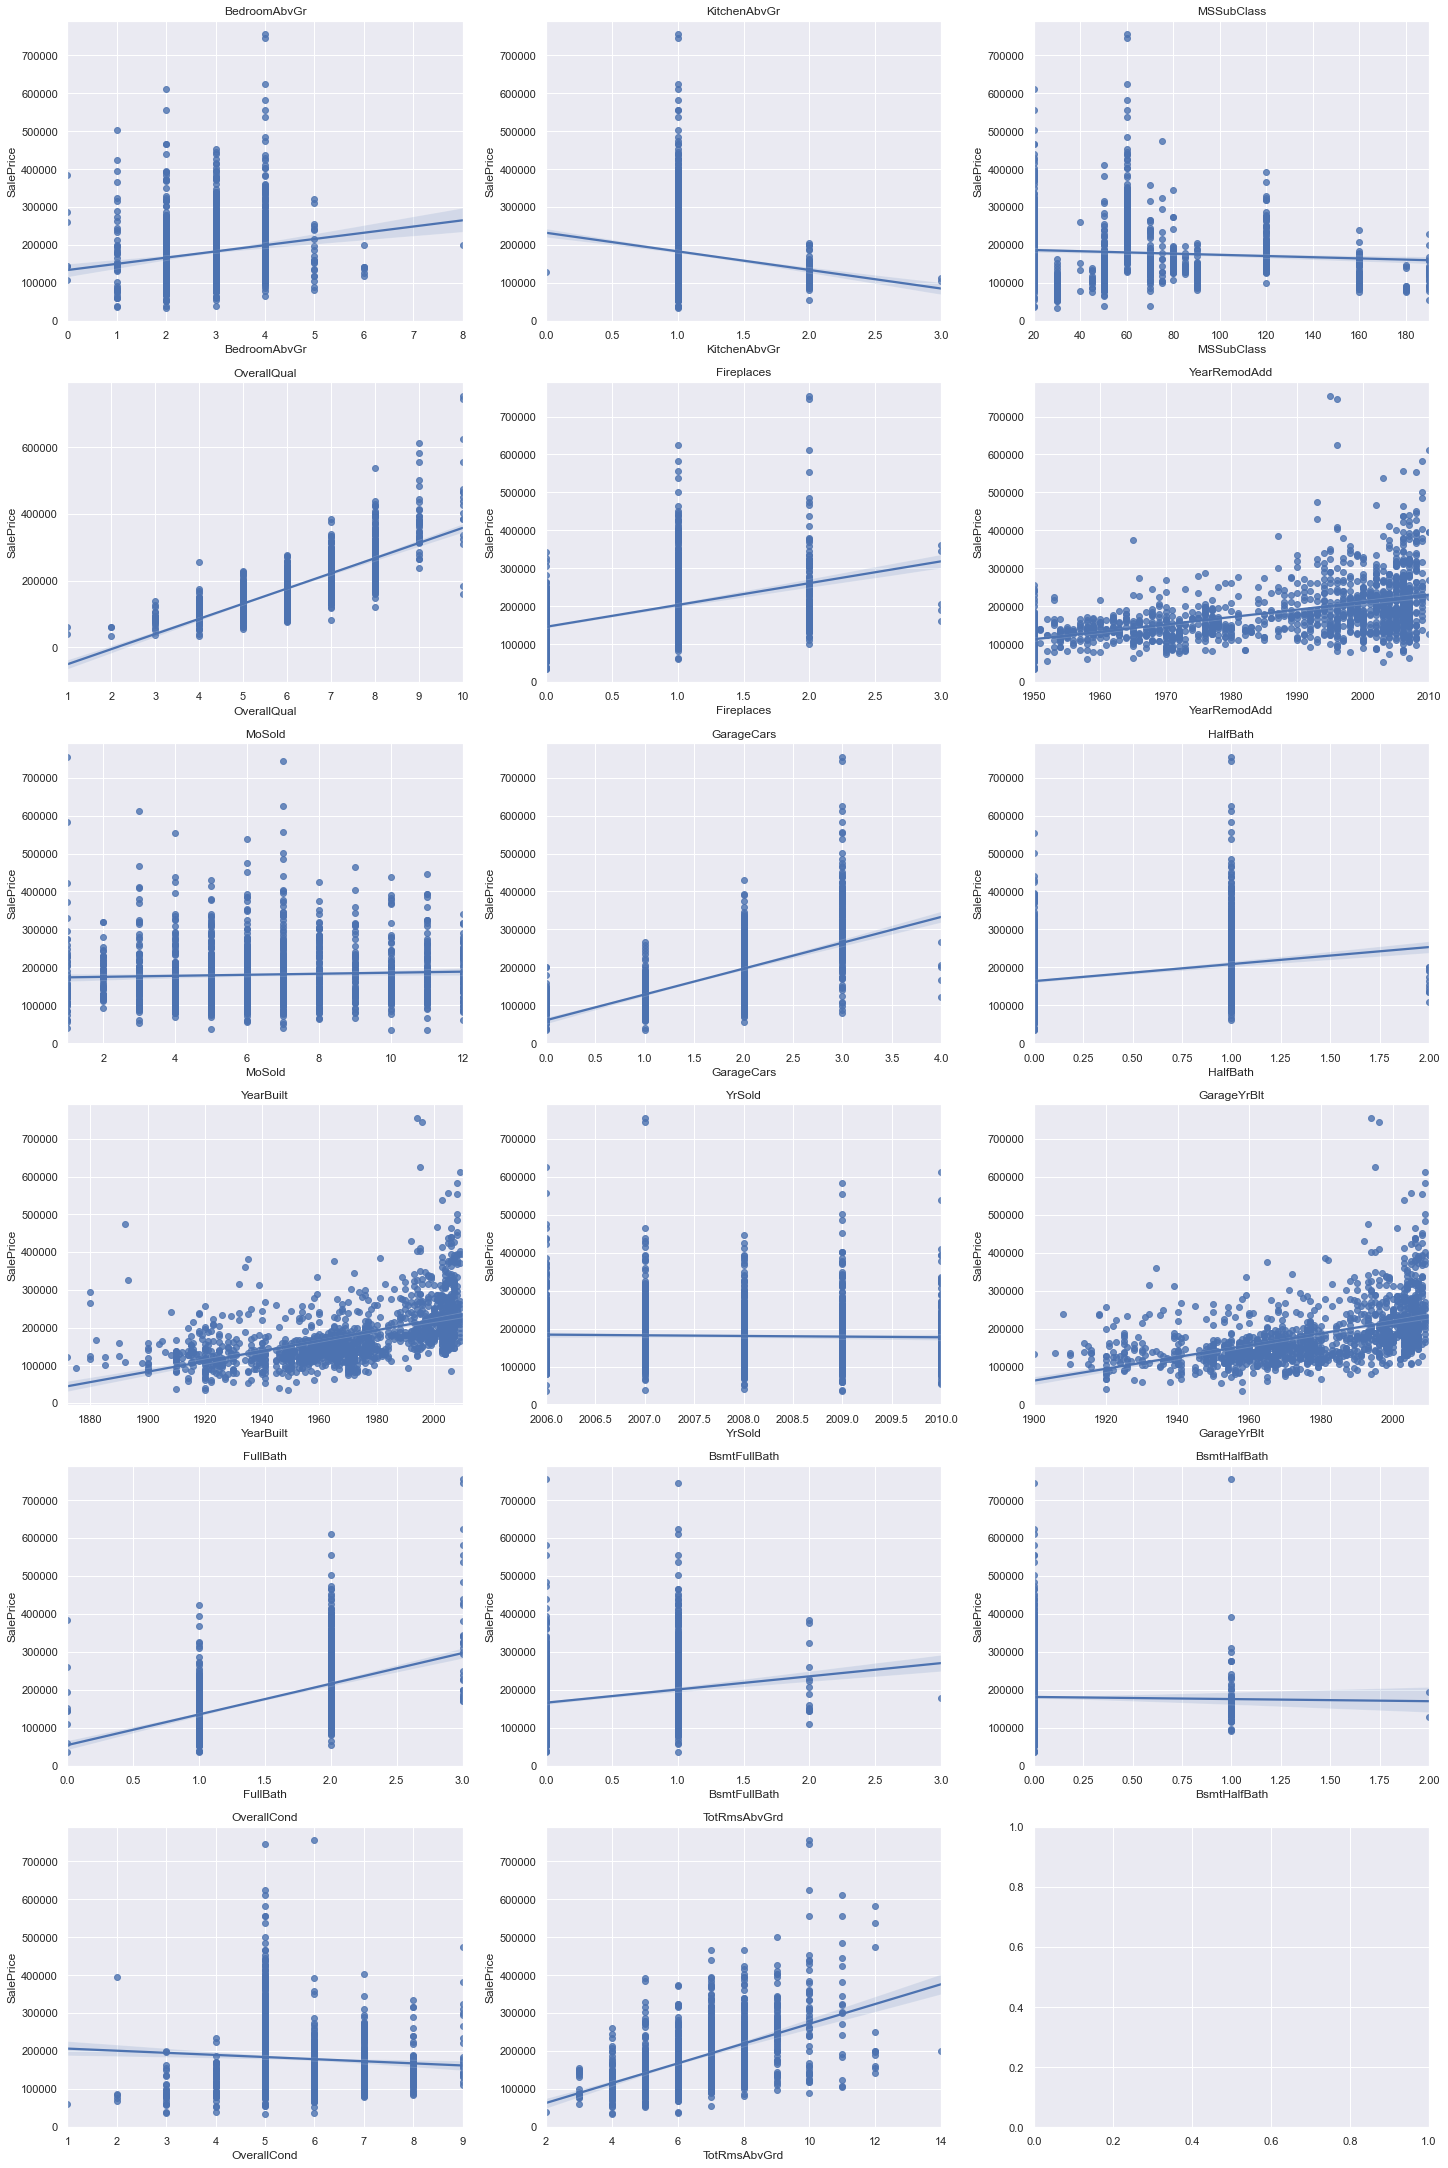

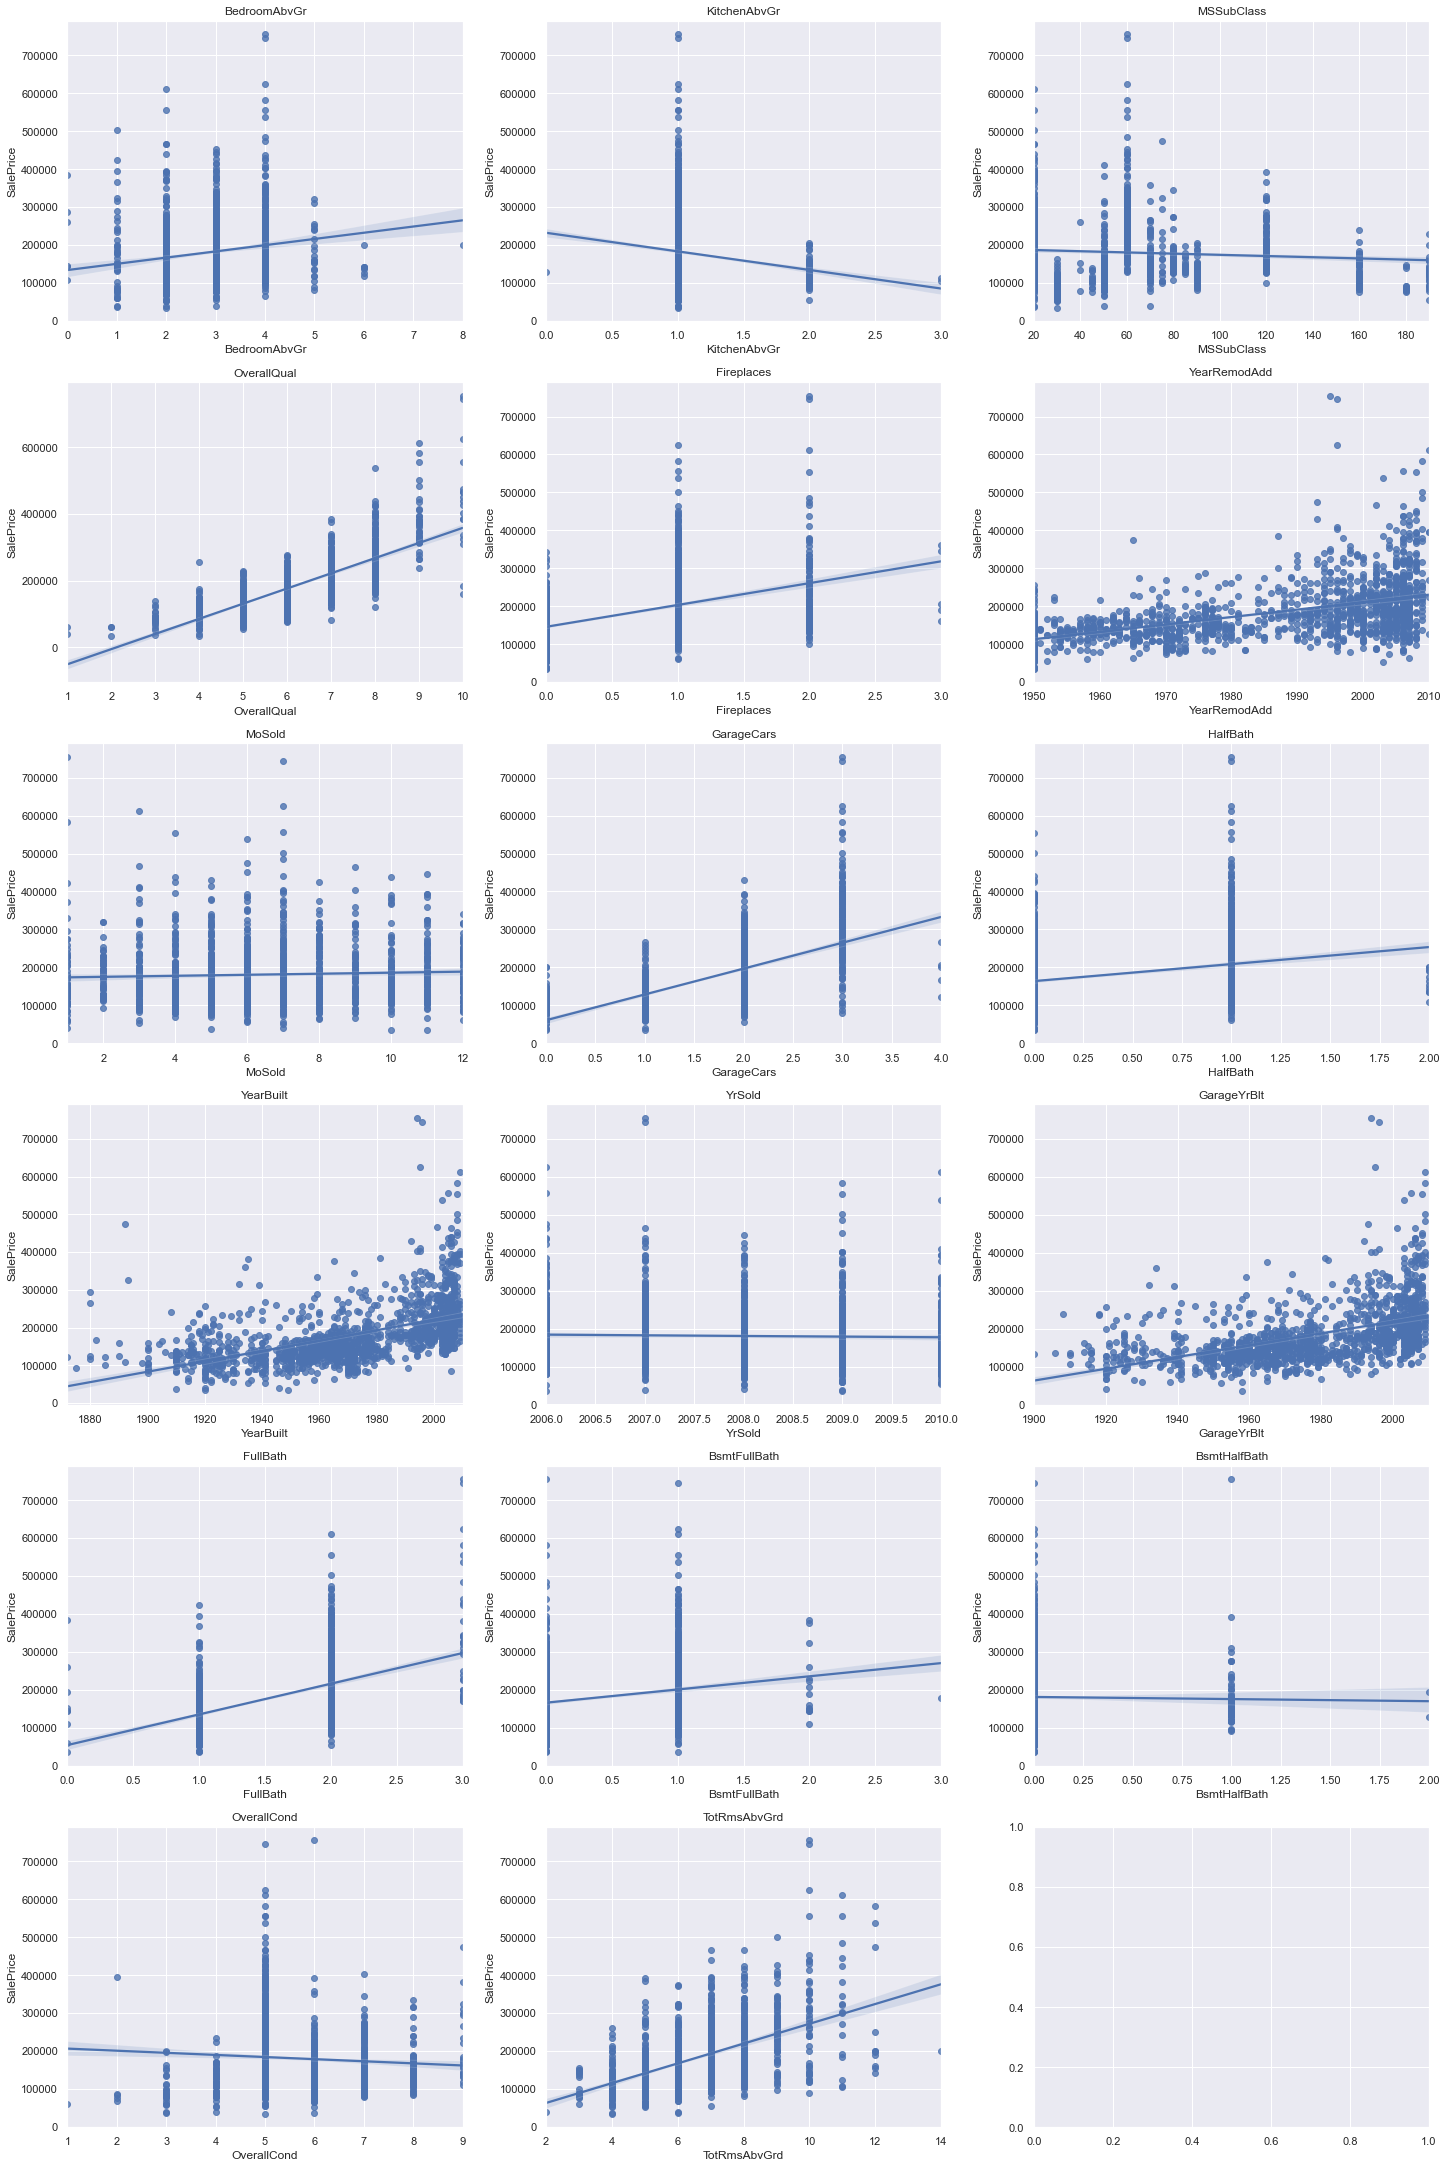

In [148]:
# RegPlot
drawing_regplots(train_discrete)

### categorical 
- scatter plot
- countplot

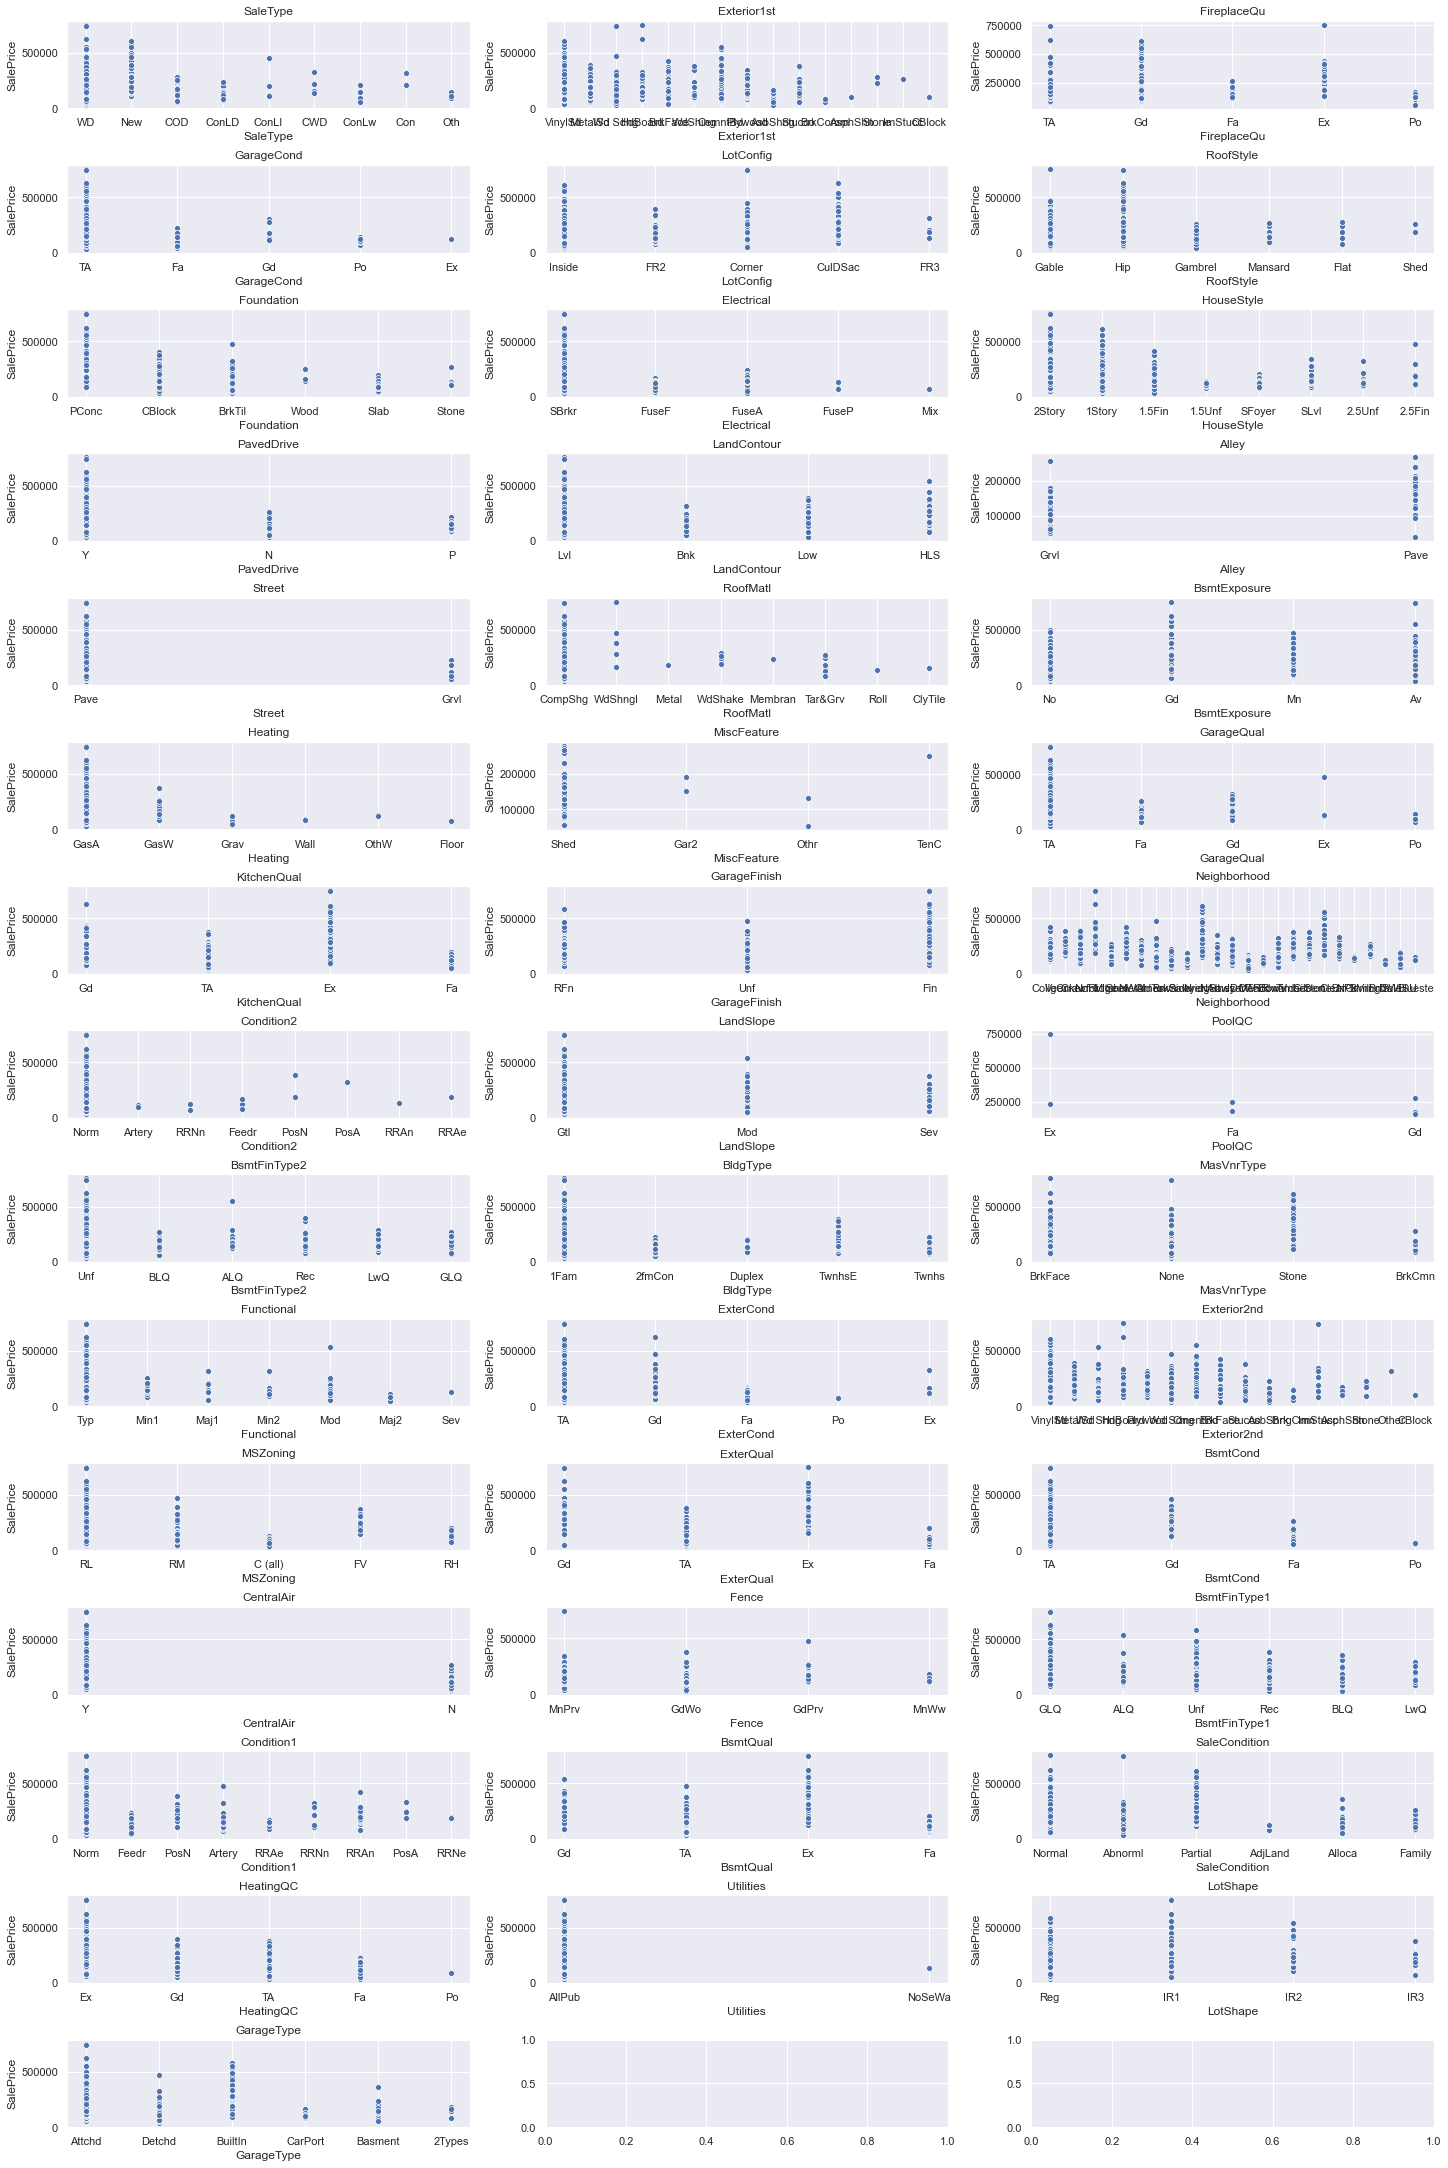

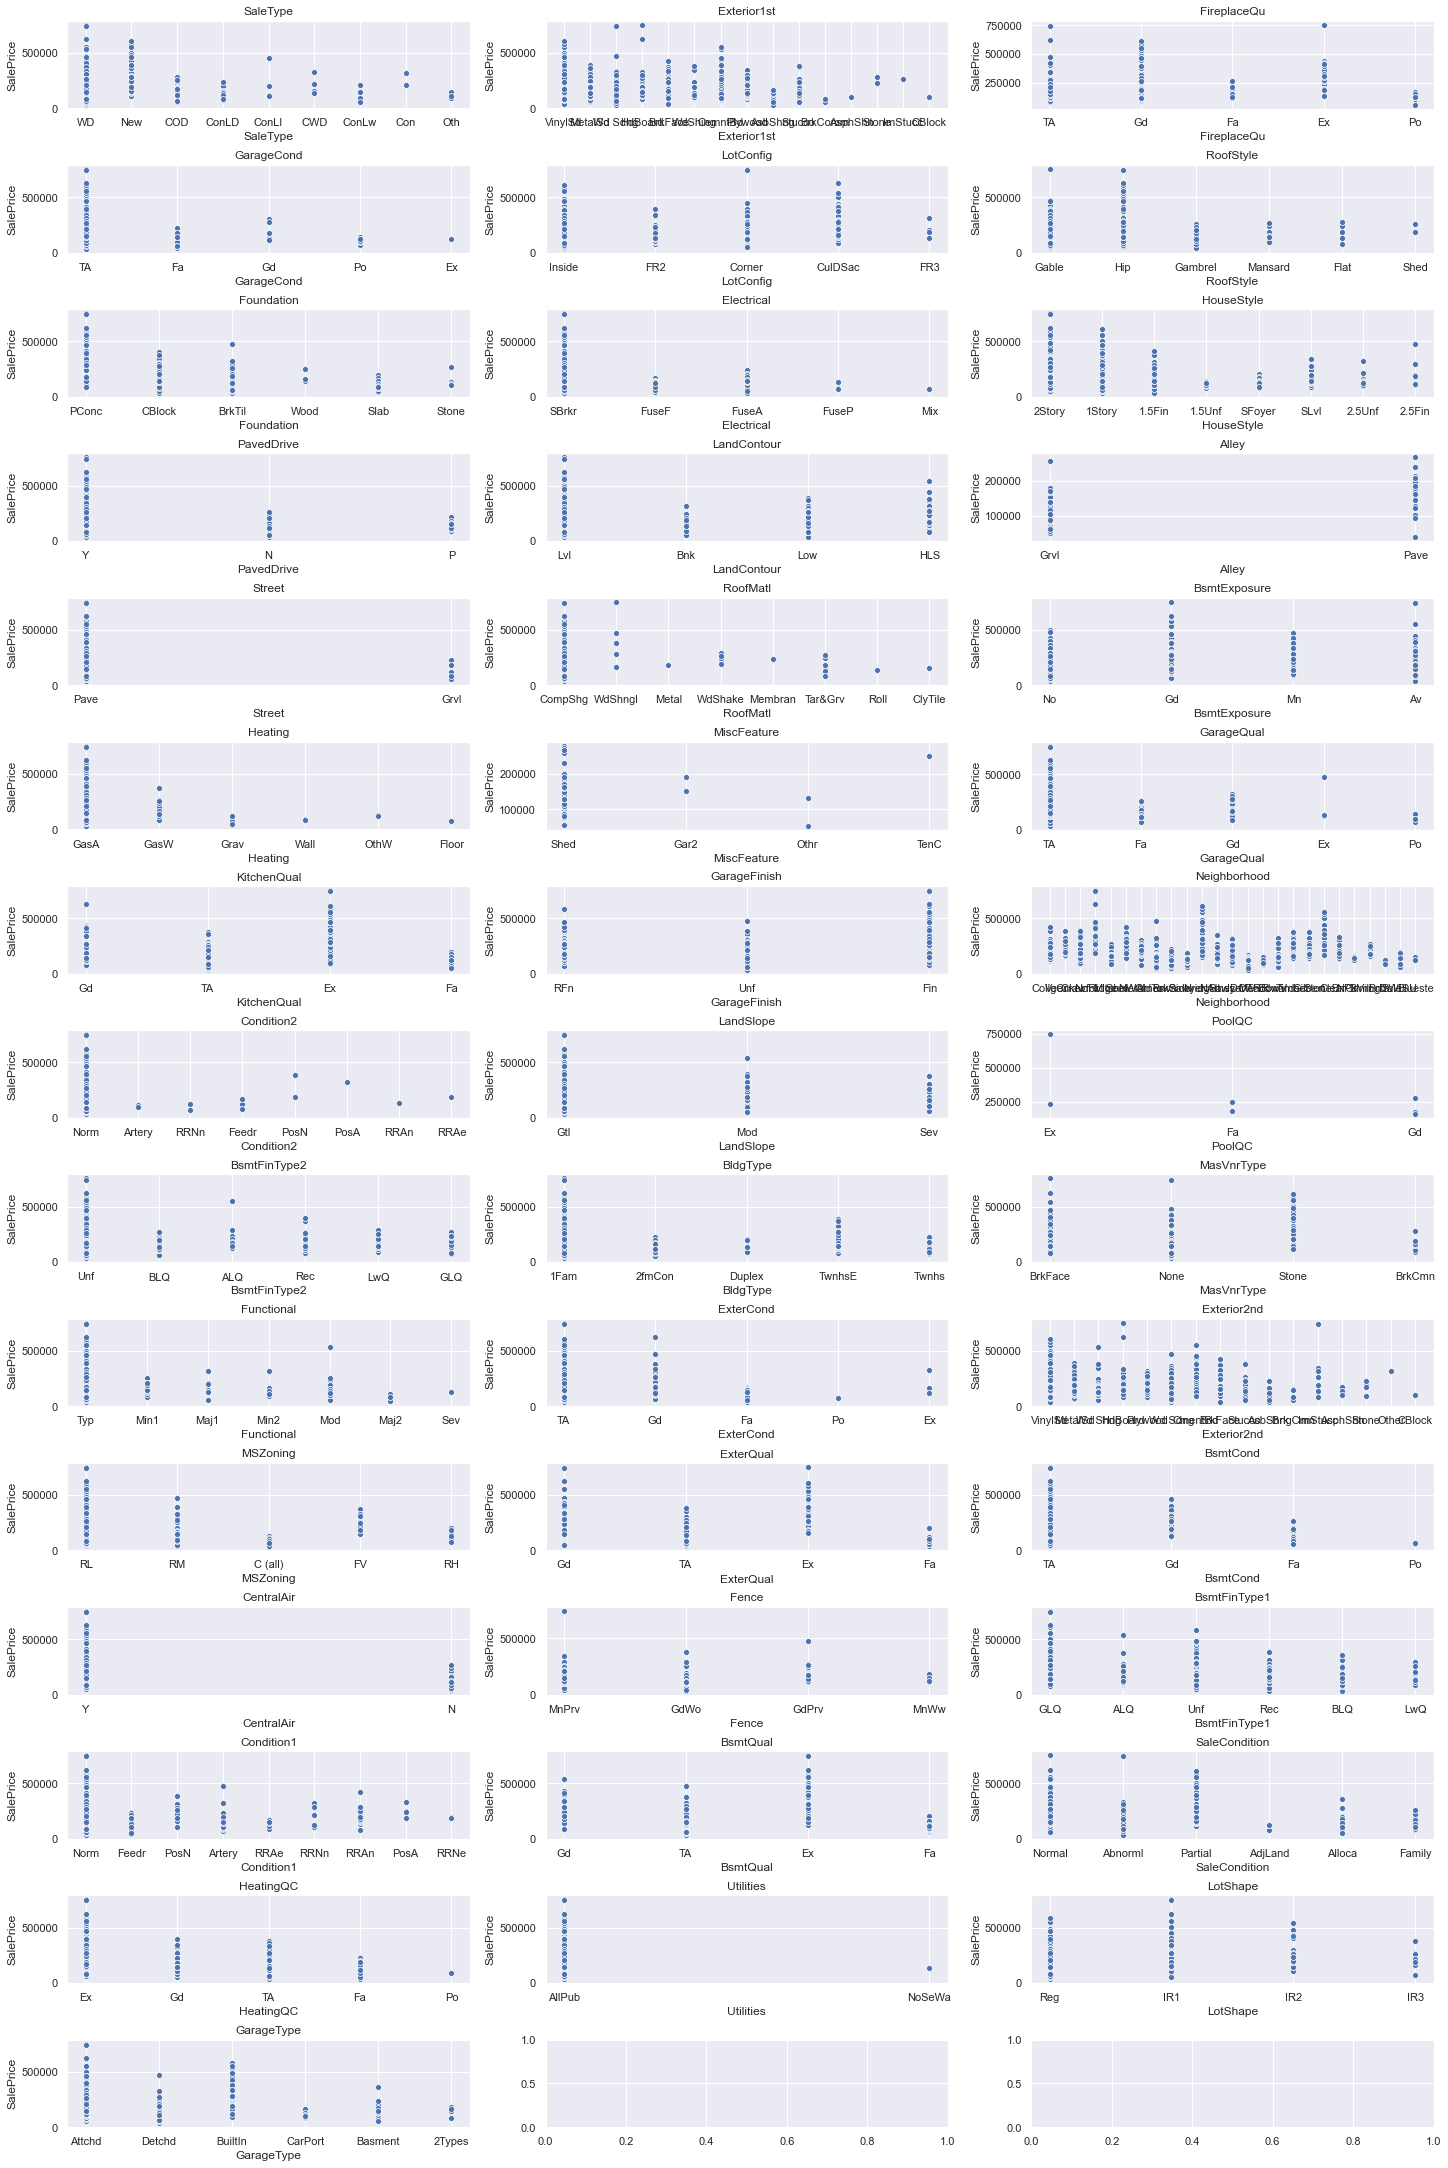

In [149]:
drawing_scatterplots(train_categorical)

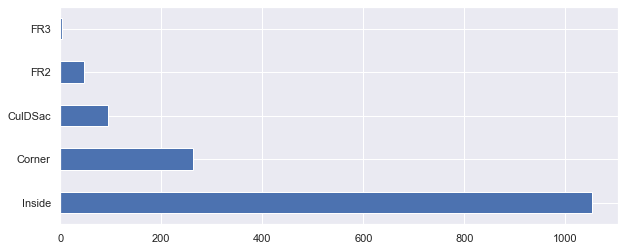

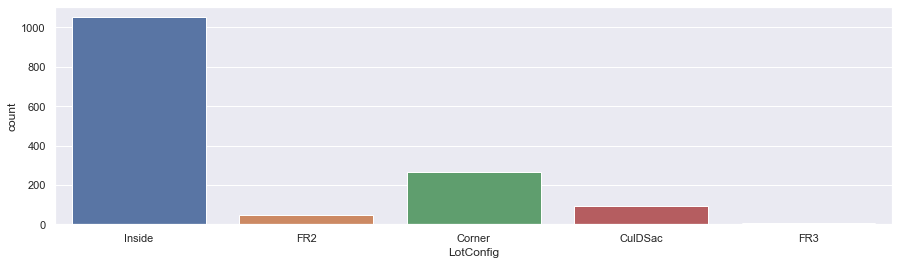

In [150]:
# value_counts, plot
plt.figure(figsize = (10,4))
train[train_categorical]['LotConfig'].value_counts().plot.barh()
plt.show()

# CountPlot
plt.figure(figsize = (15,4))
sns.countplot(x = "LotConfig", data = train[train_categorical])
plt.show()

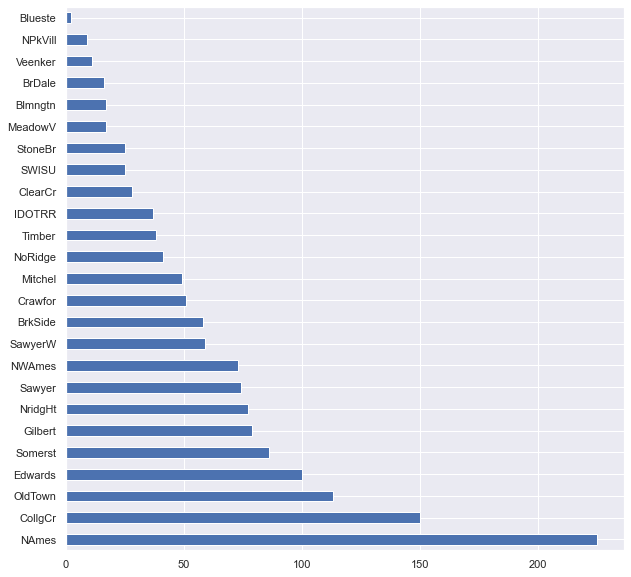

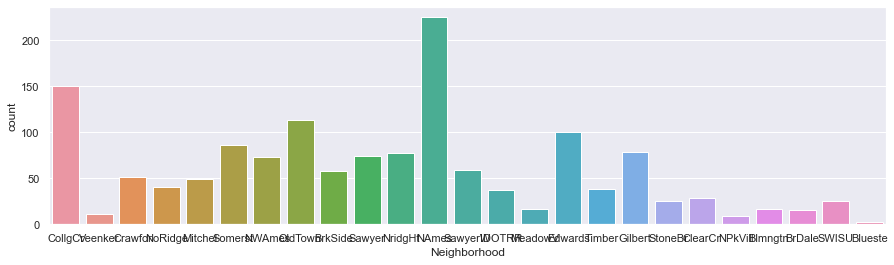

In [151]:
# value_counts, plot
plt.figure(figsize = (10,10))
train[train_categorical]['Neighborhood'].value_counts().plot.barh()
plt.show()

# countplot
plt.figure(figsize = (15,4))
sns.countplot(x = "Neighborhood",data = train[train_categorical])
plt.show()

## Preprocessing

### Missing value
- 범주형 변수의 결측치는 anova 분석을 하는 단계에서 처리함. (뒤에 나옴)

In [152]:
# 3 features만 결측치가 존재.
# LotFrontage, MasVnrArea, GarageYrBlt
train[train_numerical].isnull().sum()

BedroomAbvGr       0
MiscVal            0
KitchenAbvGr       0
PoolArea           0
MSSubClass         0
OverallQual        0
BsmtFinSF1         0
YearRemodAdd       0
ScreenPorch        0
MoSold             0
BsmtUnfSF          0
HalfBath           0
BsmtFinSF2         0
YrSold             0
OverallCond        0
MasVnrArea         8
TotalBsmtSF        0
GrLivArea          0
WoodDeckSF         0
Fireplaces         0
LowQualFinSF       0
3SsnPorch          0
OpenPorchSF        0
1stFlrSF           0
GarageCars         0
LotArea            0
EnclosedPorch      0
LotFrontage      259
YearBuilt          0
GarageYrBlt       81
FullBath           0
BsmtFullBath       0
GarageArea         0
BsmtHalfBath       0
2ndFlrSF           0
TotRmsAbvGrd       0
dtype: int64

In [153]:
for feature in train_numerical:
    if train[feature].isnull().sum() != 0:
        print(feature, train[feature].isnull().sum() )

MasVnrArea 8
LotFrontage 259
GarageYrBlt 81


In [154]:
# LotFrontage
# 결측치 259개 존재
# 변수 자체를 삭제.
train.drop('LotFrontage',axis=1, inplace=True)
train_numerical.remove('LotFrontage')
train_continuous.remove('LotFrontage')

In [155]:
# MasVnrArea : 외부에 쌓는 이중벽 같은 느낌
# nan이 none(0)을 뜻한다
# 결측치를 0으로 채워준다
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

In [156]:
# GarageYrBlt
# YearBuit와 겹치는 값이 많이 있음. 
# 변수 자체를 삭제
train.drop('GarageYrBlt',axis=1, inplace=True)
train_numerical.remove('GarageYrBlt')
train_discrete.remove('GarageYrBlt')

### Outliers
- 각 feature의 regplot을 보고 판단.

In [157]:
def outliers(df):  
    df_ = df.drop(df.index[(df['1stFlrSF']>4500) |
         (df['BsmtFinSF1']>5000) |
         (df['GarageArea']>1240) |
         ((df['OpenPorchSF']>500) & (df['SalePrice']<100000)) |
         ((df['OverallQual']==4) & (df['SalePrice']>200000)) |
         ((df['OverallQual']==10) & (df['SalePrice']<200000)) |
         (df['TotalBsmtSF']>6000)])   
    return df_

In [162]:
train = outliers(train)

## Feature Engineering (Feature Selection)
### Correlation with dependent  variable
> Numerical feature
- 종속변수와의 1대1 상관관계 -> 유의미한 변수 선택

> Categorical feature
- 종속변수와의 1대1 상관관계 -> 유의미한 변수 선택

> correlation coefficient
- Pearson Correlation Coefficient ,PCC (피어슨 상관계수)
- Spearman's rank correlation coefficient (스피어먼 상관계수)
- Kendall rank correlation coefficient , kendalltau (켄달 상관계수)

#### Numerical Feature Selection
> 피어슨 상관계수
- 비교하는 두 변수가 정규분포, 연속형 임을 가정.
- 이산형, 범주형 변수에 사용하기에는 이론의 가정 상 문제가 있어보임.
- 선형관계만 비교할 수 있음.
- 범위 : -1 ~ 1

> 스피어맨, 켄달 상관계수
- 자료가 비모수 (정규분포가 아님)
- 전체 데이터들의 rank를 비교함으로써, 두 변수의 관계를 측정 
- 비선형 관계도 비교 가능.
- rank를 비교하기 때문에 이산형 변수에도 적용 가능.
- 범위 : -1 ~ 1

##### continuous feature
- 상관계수를 구하기 위해 'SalePrice' 일시적으로 추가.

In [179]:
train_continuous.add('SalePrice')

In [180]:
# correlation coefficient
# continuous feature

corr_mat_Pearson = train[train_continuous].corr()  # default 값이 method='pearson' 피어슨 상관계수 매트릭스
corr_mat_Spearman = train[train_continuous].corr(method='spearman')  # spearman 상관계수 매트릭스
corr_mat_kendall = train[train_continuous].corr(method='kendall')  # kendall 상관계수 매트릭스

num = 21
# nlargest(num, [Column1, Column2,,,,]) 
#    - num : 큰 수부터 나열할 때, 몇개까지 나타낼 것인지. 총 개수보다 많으면 전체를 출력
#    - ColumnList : 순서대로 정렬 순서가 됨. 첫번째 컬럼을 모든 행을 정렬 => 우선순위가 동일한 값들에 대하여, 두번째 컬럼으로 모든 행 정렬 => ...
c1 = corr_mat_Pearson.nlargest(num, 'SalePrice')['SalePrice']  # SalePrice 를 기준으로 corrMat 전체를 정렬한 후 SalePrice 컬럼만 보겠다!
c2 = corr_mat_Spearman.nlargest(num, 'SalePrice')['SalePrice']
c3 = corr_mat_kendall.nlargest(num, 'SalePrice')['SalePrice']

In [181]:
# 연속형 변수는 pearson, spearman, kendall 상관계수의 평균으로 판단
# 0.3 이상은 관계가 어느정도 있다 판단.

corr_continuous = (corr_mat_Pearson['SalePrice']+corr_mat_Spearman['SalePrice'] + corr_mat_kendall['SalePrice']) / 3
corr_continuous = corr_continuous.sort_values(ascending=False)

In [182]:
corr_continuous

SalePrice        1.000000
GrLivArea        0.669716
GarageArea       0.591408
TotalBsmtSF      0.562799
1stFlrSF         0.538769
MasVnrArea       0.403642
OpenPorchSF      0.389773
LotArea          0.347468
WoodDeckSF       0.312857
BsmtFinSF1       0.311320
2ndFlrSF         0.282941
BsmtUnfSF        0.175571
ScreenPorch      0.097592
PoolArea         0.071861
3SsnPorch        0.054625
BsmtFinSF2      -0.027134
MiscVal         -0.041487
LowQualFinSF    -0.049788
EnclosedPorch   -0.171359
Name: SalePrice, dtype: float64

In [183]:
train_continuous.remove('SalePrice')

{'1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'EnclosedPorch',
 'GarageArea',
 'GrLivArea',
 'LotArea',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'ScreenPorch',
 'TotalBsmtSF',
 'WoodDeckSF'}

##### discrete feature
- 상관계수를 구하기 위해 'SalePrice' 일시적으로 추가.

In [185]:
# trian_discrete에서 SalePrice 추가
train_discrete.add('SalePrice')

In [186]:
corr_mat_Pearson = train[train_discrete].corr()
corr_mat_Spearman = train[train_discrete].corr(method='spearman')
corr_mat_kendall = train[train_discrete].corr(method='kendall')

num = 17
c1 = corr_mat_Pearson.nlargest(num, 'SalePrice')['SalePrice']
c2 = corr_mat_Spearman.nlargest(num, 'SalePrice')['SalePrice']
c3 = corr_mat_kendall.nlargest(num, 'SalePrice')['SalePrice']

In [187]:
# Pearson 상관계수는 제외.

corr_discrete = (corr_mat_Spearman['SalePrice'] + corr_mat_kendall['SalePrice']) / 2
corr_discrete = corr_discrete.sort_values(ascending=False)

In [188]:
corr_discrete

SalePrice       1.000000
OverallQual     0.743210
GarageCars      0.634391
FullBath        0.578543
YearBuilt       0.562521
YearRemodAdd    0.491013
TotRmsAbvGrd    0.471541
Fireplaces      0.465058
HalfBath        0.310389
BedroomAbvGr    0.209457
BsmtFullBath    0.203209
MoSold          0.062311
MSSubClass      0.002176
BsmtHalfBath   -0.011047
YrSold         -0.025421
OverallCond    -0.119424
KitchenAbvGr   -0.150323
Name: SalePrice, dtype: float64

In [189]:
# trian_discrete에서 SalePrice 제거
train_discrete.remove('SalePrice')

#### Categoricl Feature Selection
> Correlation coefficient
- 종속변수와의 관계를 확인하는데 상관계수를 통한 적절한 방법을 찾지 못함.

> Anova
- 범주형 변수에 따라 종속변수를 분리하여 Anova를 통해 집단의 분포를 비교.
- 두 분포가 차이가 없으면 그 범주형 독립변수는 종속변수를 결정하는데 유의하지 않다고 판단.

In [190]:
# SalePrice가 포함되지 않은 것을 확인.
'SalePrice' in train_categorical

False

In [191]:
labels = []
for feature in train_categorical:
    groups = {}
    labels = train[feature].unique()  # 해당 feature 가 갖는 값들의 유일한 값들 (예, GarageFinish: ['RFn', 'Unf', 'Fin', nan], PavedDrive: ['Y', 'N', 'P'],,,)
    for label in labels:    # 하나의 값에 대하여 (예, GarageFinish: ['RFn', 'Unf', 'Fin', nan] 이 중 하나씩!)
                            # 해당 값에 해당하는 모든 SalePrice. (예, GarageFinish 가 'RFn'라는 값을 가질 때 대응하는 모든 SalePrice)
                            # groups = {'RFn': DataFrame(해당값들포함), 'Unf': DataFrame(해당값들포함),,,}
                            # groups 는 labels 변수와 의미가 같다고 보면 됨. 새로운 범주형 변수를 취급할 때 초기화됨.
            groups[label] = train[train[feature]==label].loc[:,'SalePrice']
            # groups 는 딕셔너리 타입 
            # 딕셔너리.values() => 딕셔너리 안에 있는 값들을 리스트로 반환!
            # 리스트 앞에 *을 붙이면 리스트가 unpacking 됨. 
            # 매개변수로 리스트를 넘겨주면 리스트타입 변수 하나만 넘겨준 것이지만, unpacking 하면 리스트 안에 있는 데이터 n개를 따로 넘겨주는 것과 같다.
            # *groups.values() 는 하나의 범주형 변수가 갖는 여러 값에 대한 SalePrice를 다 넘겨주는 셈이다.
            # 잘 모르겠으면 위의 코드 복붙하고 print(*groups.values()) / print(groups.values()) 이렇게 두 개 해보면 바로 알 듯.
    F_statistic, pVal = stats.f_oneway(*groups.values())  # 하나의 범주형 변수 내에서 존재하는 여러 값들이 서로 다 다른 분포를 띄고 있는지 분산검정!
    print(feature + ": {}".format([*labels]))
    print("F value: {}, p-value: {}\n".format(F_statistic, pVal))

SaleType: ['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth']
F value: 29.12434890321062, p-value: 2.169394121955847e-42

Exterior1st: ['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing', 'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn', 'Stone', 'ImStucc', 'CBlock']
F value: 18.401940719812636, p-value: 8.836405853243811e-43

FireplaceQu: [nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po']
F value: nan, p-value: nan

GarageCond: ['TA', 'Fa', nan, 'Gd', 'Po', 'Ex']
F value: nan, p-value: nan

LotConfig: ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
F value: 7.565499190874819, p-value: 4.962003533425365e-06

RoofStyle: ['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed']
F value: 17.593930542806405, p-value: 5.949514080896948e-17

Foundation: ['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone']
F value: 100.02294125500717, p-value: 1.0185150332281065e-90

Electrical: ['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan]
F value: nan, p-value: nan

HouseStyle

In [192]:
# 결과를 보았을 때 Nan이 나온 변수들이 존재 -> 결측치가 있음.
# Nan 나온 변수들 수기로 복붙.
missing_features = ['PoolQC','MasVnrType','MiscFeature','GarageQual',
                    'GarageType','GarageFinish','GarageCond','FireplaceQu',
                    'Fence','Electrical','BsmtQual','BsmtFinType2',
                    'BsmtFinType1','BsmtExposure','BsmtCond','Alley']

# Electrical 변수는 주최측에서 제공한 description에는 nan 이 없는데, 
# 데이터 상에 딱 1개 있어 최빈값을 할당해줌.
train['Electrical'].fillna('SBrkr', inplace=True)  

# 나머지 feature에서 none 값은 없다는 뜻 => 'None' 항목을 새로 만들어주었다.
for feature in missing_features:
    train[feature].fillna('None', inplace=True)

In [193]:
# Anova code 다시 실행
anova_result = pd.DataFrame(columns = ['Feature', 'p-value'])
labels = []
for feature in train_categorical:
    groups = {}
    labels = train[feature].unique()  
    for label in labels:
        groups[label] = train[train[feature]==label].loc[:,'SalePrice'] 
        
    F_statistic, pVal = stats.f_oneway(*groups.values()) 
    print(feature + ": {}".format([*labels]))
    print("F value: {}, p-value: {}\n".format(F_statistic, pVal))
    anova_result=anova_result.append({'Feature': feature, 'p-value': pVal}, ignore_index=True)

SaleType: ['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth']
F value: 29.12434890321062, p-value: 2.169394121955847e-42

Exterior1st: ['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing', 'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn', 'Stone', 'ImStucc', 'CBlock']
F value: 18.401940719812636, p-value: 8.836405853243811e-43

FireplaceQu: ['None', 'TA', 'Gd', 'Fa', 'Ex', 'Po']
F value: 120.10961003951614, p-value: 1.9538469931628314e-106

GarageCond: ['TA', 'Fa', 'None', 'Gd', 'Po', 'Ex']
F value: 25.138135943112626, p-value: 2.282919736061347e-24

LotConfig: ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
F value: 7.565499190874819, p-value: 4.962003533425365e-06

RoofStyle: ['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed']
F value: 17.593930542806405, p-value: 5.949514080896948e-17

Foundation: ['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone']
F value: 100.02294125500717, p-value: 1.0185150332281065e-90

Electrical: ['SBrkr', 'Fu

### Removing invalid Features
- numerical features : 상관관계 분석을 토대로 (종속변수와의 상관계수)
- categorical features : Anova 분석을 토대로

#### continuous features

In [194]:
# SalePrice 제외 
corr_continuous.drop('SalePrice', inplace = True)

In [195]:
# 종속변수와의 상관계수가 0.3 이상인 연속형 변수만 살림
corr_continuous = corr_continuous[corr_continuous>=0.3]

In [196]:
corr_continuous

GrLivArea      0.669716
GarageArea     0.591408
TotalBsmtSF    0.562799
1stFlrSF       0.538769
MasVnrArea     0.403642
OpenPorchSF    0.389773
LotArea        0.347468
WoodDeckSF     0.312857
BsmtFinSF1     0.311320
Name: SalePrice, dtype: float64

In [197]:
valid_continuous_columns = corr_continuous.index.to_list()
valid_continuous_columns

['GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'MasVnrArea',
 'OpenPorchSF',
 'LotArea',
 'WoodDeckSF',
 'BsmtFinSF1']

#### discrete features

In [198]:
# SalePrice 제외 (앞에서 추가했었음)
corr_discrete.drop('SalePrice', inplace = True)

OverallQual     0.743210
GarageCars      0.634391
FullBath        0.578543
YearBuilt       0.562521
YearRemodAdd    0.491013
TotRmsAbvGrd    0.471541
Fireplaces      0.465058
HalfBath        0.310389
BedroomAbvGr    0.209457
BsmtFullBath    0.203209
MoSold          0.062311
MSSubClass      0.002176
BsmtHalfBath   -0.011047
YrSold         -0.025421
OverallCond    -0.119424
KitchenAbvGr   -0.150323
Name: SalePrice, dtype: float64

In [199]:
# 종속변수와의 상관계수가 0.3 이상인 연속형 변수만 살림
corr_discrete = corr_discrete[corr_discrete>=0.3]
corr_discrete

OverallQual     0.743210
GarageCars      0.634391
FullBath        0.578543
YearBuilt       0.562521
YearRemodAdd    0.491013
TotRmsAbvGrd    0.471541
Fireplaces      0.465058
HalfBath        0.310389
Name: SalePrice, dtype: float64

In [200]:
valid_discrete_columns = corr_discrete.index.to_list()
valid_discrete_columns

['OverallQual',
 'GarageCars',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'Fireplaces',
 'HalfBath']

#### categorical features

In [201]:
anova_result

Feature        p-value
0        SaleType   2.169394e-42
1     Exterior1st   8.836406e-43
2     FireplaceQu  1.953847e-106
3      GarageCond   2.282920e-24
4       LotConfig   4.962004e-06
5       RoofStyle   5.949514e-17
6      Foundation   1.018515e-90
7      Electrical   5.031735e-18
8      HouseStyle   2.914862e-25
9      PavedDrive   6.248778e-18
10    LandContour   1.831669e-08
11          Alley   2.836324e-07
12         Street   2.480636e-01
13       RoofMatl   2.610308e-08
14   BsmtExposure   4.326007e-50
15        Heating   7.390766e-04
16    MiscFeature   4.844361e-02
17     GarageQual   2.157428e-24
18    KitchenQual  1.647007e-194
19   GarageFinish  9.681535e-115
20   Neighborhood  4.778571e-224
21     Condition2   1.350865e-02
22      LandSlope   1.631451e-01
23         PoolQC   6.546046e-07
24   BsmtFinType2   4.831305e-08
25       BldgType   1.663305e-10
26     MasVnrType   2.153906e-64
27     Functional   2.830673e-04
28      ExterCond   4.880154e-07
29    Exterior2nd   1.532855e-42
30       MSZoning   1.360624e-33
31      ExterQual  4.962902e-210
32       BsmtCond   7.718731e-16
33     CentralAir   7.296313e-22
34          Fence   2.062681e-10
35   BsmtFinType1   1.379760e-71
36     Condition1   7.895057e-08
37       BsmtQual  4.185040e-198
38  SaleCondition   4.450876e-44
39      HeatingQC   1.474423e-66
40      Utilities   5.839802e-01
41       LotShape   9.535862e-25
42     GarageType   5.810957e-86

In [202]:
# Anova(F-검정) 결과, p-value가 0.05 미만인 feature들만 살림
anova_result = anova_result[anova_result['p-value'] < 0.05]
anova_result

Feature        p-value
0        SaleType   2.169394e-42
1     Exterior1st   8.836406e-43
2     FireplaceQu  1.953847e-106
3      GarageCond   2.282920e-24
4       LotConfig   4.962004e-06
5       RoofStyle   5.949514e-17
6      Foundation   1.018515e-90
7      Electrical   5.031735e-18
8      HouseStyle   2.914862e-25
9      PavedDrive   6.248778e-18
10    LandContour   1.831669e-08
11          Alley   2.836324e-07
13       RoofMatl   2.610308e-08
14   BsmtExposure   4.326007e-50
15        Heating   7.390766e-04
16    MiscFeature   4.844361e-02
17     GarageQual   2.157428e-24
18    KitchenQual  1.647007e-194
19   GarageFinish  9.681535e-115
20   Neighborhood  4.778571e-224
21     Condition2   1.350865e-02
23         PoolQC   6.546046e-07
24   BsmtFinType2   4.831305e-08
25       BldgType   1.663305e-10
26     MasVnrType   2.153906e-64
27     Functional   2.830673e-04
28      ExterCond   4.880154e-07
29    Exterior2nd   1.532855e-42
30       MSZoning   1.360624e-33
31      ExterQual  4.962902e-210
32       BsmtCond   7.718731e-16
33     CentralAir   7.296313e-22
34          Fence   2.062681e-10
35   BsmtFinType1   1.379760e-71
36     Condition1   7.895057e-08
37       BsmtQual  4.185040e-198
38  SaleCondition   4.450876e-44
39      HeatingQC   1.474423e-66
41       LotShape   9.535862e-25
42     GarageType   5.810957e-86

In [203]:
valid_categorical_columns = anova_result['Feature'].tolist()
valid_categorical_columns

['SaleType',
 'Exterior1st',
 'FireplaceQu',
 'GarageCond',
 'LotConfig',
 'RoofStyle',
 'Foundation',
 'Electrical',
 'HouseStyle',
 'PavedDrive',
 'LandContour',
 'Alley',
 'RoofMatl',
 'BsmtExposure',
 'Heating',
 'MiscFeature',
 'GarageQual',
 'KitchenQual',
 'GarageFinish',
 'Neighborhood',
 'Condition2',
 'PoolQC',
 'BsmtFinType2',
 'BldgType',
 'MasVnrType',
 'Functional',
 'ExterCond',
 'Exterior2nd',
 'MSZoning',
 'ExterQual',
 'BsmtCond',
 'CentralAir',
 'Fence',
 'BsmtFinType1',
 'Condition1',
 'BsmtQual',
 'SaleCondition',
 'HeatingQC',
 'LotShape',
 'GarageType']

#### valid features

In [204]:
valid_columns = []
for v in valid_continuous_columns:
    valid_columns.append(v)
for v in valid_discrete_columns:
    valid_columns.append(v) 
for v in valid_categorical_columns:
    valid_columns.append(v)
valid_columns

['GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'MasVnrArea',
 'OpenPorchSF',
 'LotArea',
 'WoodDeckSF',
 'BsmtFinSF1',
 'OverallQual',
 'GarageCars',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'Fireplaces',
 'HalfBath',
 'SaleType',
 'Exterior1st',
 'FireplaceQu',
 'GarageCond',
 'LotConfig',
 'RoofStyle',
 'Foundation',
 'Electrical',
 'HouseStyle',
 'PavedDrive',
 'LandContour',
 'Alley',
 'RoofMatl',
 'BsmtExposure',
 'Heating',
 'MiscFeature',
 'GarageQual',
 'KitchenQual',
 'GarageFinish',
 'Neighborhood',
 'Condition2',
 'PoolQC',
 'BsmtFinType2',
 'BldgType',
 'MasVnrType',
 'Functional',
 'ExterCond',
 'Exterior2nd',
 'MSZoning',
 'ExterQual',
 'BsmtCond',
 'CentralAir',
 'Fence',
 'BsmtFinType1',
 'Condition1',
 'BsmtQual',
 'SaleCondition',
 'HeatingQC',
 'LotShape',
 'GarageType']

In [205]:
len(valid_columns) # 57

57

In [206]:
# 유효한 독립변수들만 남은 train data
train_preprocessing = train[valid_columns]

### Multicollinearity
> 수치형 변수
- vif
- 독립변수끼리의 상관관계

#### vif

In [207]:
valid_numerical_columns = valid_continuous_columns + valid_discrete_columns
valid_numerical_columns

['GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'MasVnrArea',
 'OpenPorchSF',
 'LotArea',
 'WoodDeckSF',
 'BsmtFinSF1',
 'OverallQual',
 'GarageCars',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'Fireplaces',
 'HalfBath']

In [209]:
'SalePrice' in valid_numerical_columns

False

In [211]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [212]:
train_preprocessing_numerical = train_preprocessing[valid_numerical_columns]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_preprocessing_numerical.values,i)
                     for i in range(train_preprocessing_numerical.shape[1])]
vif["features"] = train_preprocessing_numerical.columns
vif

VIF Factor      features
0     66.152489     GrLivArea
1     31.869334    GarageArea
2     26.682543   TotalBsmtSF
3     45.287368      1stFlrSF
4      1.760634    MasVnrArea
5      1.789749   OpenPorchSF
6      2.448433       LotArea
7      1.769786    WoodDeckSF
8      2.877086    BsmtFinSF1
9     52.696555   OverallQual
10    36.559495    GarageCars
11    20.574477      FullBath
12  9149.095425     YearBuilt
13  8997.831852  YearRemodAdd
14    59.013976  TotRmsAbvGrd
15     2.781411    Fireplaces
16     3.088074      HalfBath

In [215]:
# YearBuilt, YearRemodAdd가 엄청 높게 나옴
# YearRemodAdd 제거 (YearBuilt가 비교적 종속변수와 상관계수 높음)
# YearBuilt       0.562521
# YearRemodAdd    0.491013

valid_numerical_columns.remove('YearRemodAdd')
valid_discrete_columns.remove('YearRemodAdd')

train_preprocessing_numerical = train_preprocessing[valid_numerical_columns]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_preprocessing_numerical.values,i)
                     for i in range(train_preprocessing_numerical.shape[1])]
vif["features"] = train_preprocessing_numerical.columns
vif

VIF Factor      features
0    61.528941     GrLivArea
1    31.837605    GarageArea
2    26.450620   TotalBsmtSF
3    45.174291      1stFlrSF
4     1.725828    MasVnrArea
5     1.787076   OpenPorchSF
6     2.447166       LotArea
7     1.769036    WoodDeckSF
8     2.859508    BsmtFinSF1
9    52.696472   OverallQual
10   36.384582    GarageCars
11   19.007220      FullBath
12   41.754974     YearBuilt
13   58.885062  TotRmsAbvGrd
14    2.777728    Fireplaces
15    2.866830      HalfBath

In [216]:
# 10이상이면 다중공선성이 있다고 판단.
vif = vif.sort_values(by=['VIF Factor'], ascending=False)
vif

VIF Factor      features
0    61.528941     GrLivArea
13   58.885062  TotRmsAbvGrd
9    52.696472   OverallQual
3    45.174291      1stFlrSF
12   41.754974     YearBuilt
10   36.384582    GarageCars
1    31.837605    GarageArea
2    26.450620   TotalBsmtSF
11   19.007220      FullBath
15    2.866830      HalfBath
8     2.859508    BsmtFinSF1
14    2.777728    Fireplaces
6     2.447166       LotArea
5     1.787076   OpenPorchSF
7     1.769036    WoodDeckSF
4     1.725828    MasVnrArea

#### correlation coefficient
- Correlation Heatmap

In [217]:
# 이산형, 연속형 포함되어있어 우선 Pearson, Kendall, Spearman 평균 사용
corr_Pearson = train_preprocessing_numerical.corr()
corr_Kendall = train_preprocessing_numerical.corr(method = 'kendall')
corr_Spearman = train_preprocessing_numerical.corr(method = 'spearman')

average_corr = (corr_Pearson + corr_Kendall + corr_Spearman) / 3
average_corr

GrLivArea  GarageArea  TotalBsmtSF  1stFlrSF  MasVnrArea  \
GrLivArea      1.000000    0.418816     0.355292  0.476596    0.306445   
GarageArea     0.418816    1.000000     0.431790  0.433316    0.331038   
TotalBsmtSF    0.355292    0.431790     1.000000  0.787249    0.318702   
1stFlrSF       0.476596    0.433316     0.787249  1.000000    0.307114   
MasVnrArea     0.306445    0.331038     0.318702  0.307114    1.000000   
OpenPorchSF    0.336671    0.279190     0.227781  0.195609    0.157642   
LotArea        0.328570    0.253851     0.278253  0.338168    0.128800   
WoodDeckSF     0.211622    0.216542     0.209880  0.201178    0.157542   
BsmtFinSF1     0.077052    0.234079     0.396589  0.317908    0.218563   
OverallQual    0.551419    0.515423     0.449075  0.395213    0.378854   
GarageCars     0.462145    0.825506     0.421115  0.416555    0.366959   
FullBath       0.611862    0.408518     0.306087  0.348346    0.267216   
YearBuilt      0.220991    0.465350     0.372395  0.256423    0.330244   
TotRmsAbvGrd   0.779906    0.300133     0.221953  0.339818    0.244758   
Fireplaces     0.438615    0.244372     0.300968  0.367155    0.236632   
HalfBath       0.402337    0.150393    -0.089138 -0.140284    0.166489   

              OpenPorchSF   LotArea  WoodDeckSF  BsmtFinSF1  OverallQual  \
GrLivArea        0.336671  0.328570    0.211622    0.077052     0.551419   
GarageArea       0.279190  0.253851    0.216542    0.234079     0.515423   
TotalBsmtSF      0.227781  0.278253    0.209880    0.396589     0.449075   
1stFlrSF         0.195609  0.338168    0.201178    0.317908     0.395213   
MasVnrArea       0.157642  0.128800    0.157542    0.218563     0.378854   
OpenPorchSF      1.000000  0.120133    0.093927    0.069243     0.365496   
LotArea          0.120133  1.000000    0.158191    0.152410     0.170094   
WoodDeckSF       0.093927  0.158191    1.000000    0.167646     0.237938   
BsmtFinSF1       0.069243  0.152410    0.167646    1.000000     0.154770   
OverallQual      0.365496  0.170094    0.237938    0.154770     1.000000   
GarageCars       0.287686  0.247558    0.230820    0.188122     0.590696   
FullBath         0.318266  0.184805    0.205314    0.023447     0.543599   
YearBuilt        0.291503  0.061467    0.239311    0.197470     0.572524   
TotRmsAbvGrd     0.248335  0.294389    0.150990   -0.027717     0.397968   
Fireplaces       0.189336  0.293734    0.195765    0.193953     0.394044   
HalfBath         0.234013  0.089576    0.104283   -0.011535     0.273966   

              GarageCars  FullBath  YearBuilt  TotRmsAbvGrd  Fireplaces  \
GrLivArea       0.462145  0.611862   0.220991      0.779906    0.438615   
GarageArea      0.825506  0.408518   0.465350      0.300133    0.244372   
TotalBsmtSF     0.421115  0.306087   0.372395      0.221953    0.300968   
1stFlrSF        0.416555  0.348346   0.256423      0.339818    0.367155   
MasVnrArea      0.366959  0.267216   0.330244      0.244758    0.236632   
OpenPorchSF     0.287686  0.318266   0.291503      0.248335    0.189336   
LotArea         0.247558  0.184805   0.061467      0.294389    0.293734   
WoodDeckSF      0.230820  0.205314   0.239311      0.150990    0.195765   
BsmtFinSF1      0.188122  0.023447   0.197470     -0.027717    0.193953   
OverallQual     0.590696  0.543599   0.572524      0.397968    0.394044   
GarageCars      1.000000  0.494739   0.545994      0.357765    0.307617   
FullBath        0.494739  1.000000   0.478461      0.534988    0.256580   
YearBuilt       0.545994  0.478461   1.000000      0.128921    0.150330   
TotRmsAbvGrd    0.357765  0.534988   0.128921      1.000000    0.320762   
Fireplaces      0.307617  0.256580   0.150330      0.320762    1.000000   
HalfBath        0.222017  0.143572   0.224952      0.337017    0.210422   

              HalfBath  
GrLivArea     0.402337  
GarageArea    0.150393  
TotalBsmtSF  -0.089138  
1stFlrSF     -0.140284  
MasVnrArea    0.166489  
OpenPorchSF   0.234013  
LotArea    

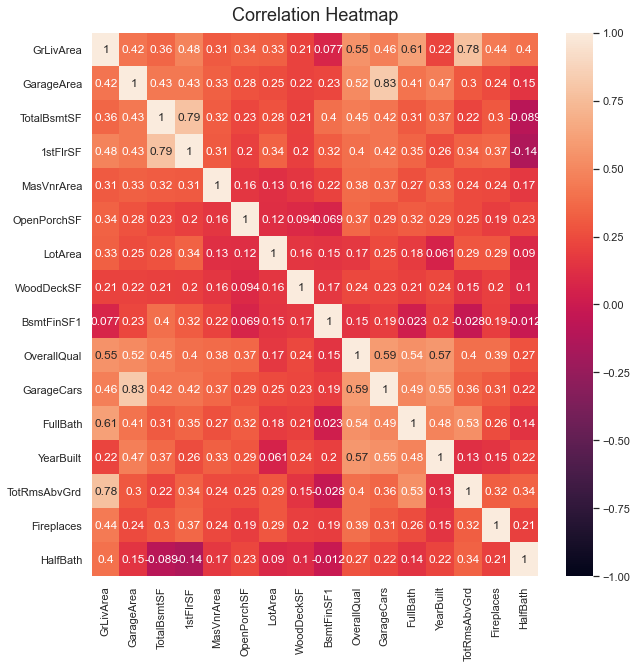

In [219]:
# correlation heatmap

plt.figure(figsize = (10,10))
heatmap = sns.heatmap(average_corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':18}, pad = 12)
plt.show()

In [220]:
# barplot
# 아래 삼각 행렬만 사용하고 matrix에서 값들 가져와서 처리
average_corr = average_corr.where(np.tril(np.ones(average_corr.shape), k=-1).astype(np.bool))
average_corr = average_corr.unstack().dropna().sort_values(ascending=False)
average_corr = average_corr[average_corr > 0.4]
average_corr = average_corr.map("{:.2f}".format).astype('float')
average_corr

GarageArea   GarageCars      0.83
TotalBsmtSF  1stFlrSF        0.79
GrLivArea    TotRmsAbvGrd    0.78
             FullBath        0.61
OverallQual  GarageCars      0.59
             YearBuilt       0.57
GrLivArea    OverallQual     0.55
GarageCars   YearBuilt       0.55
OverallQual  FullBath        0.54
FullBath     TotRmsAbvGrd    0.53
GarageArea   OverallQual     0.52
GarageCars   FullBath        0.49
FullBath     YearBuilt       0.48
GrLivArea    1stFlrSF        0.48
GarageArea   YearBuilt       0.47
GrLivArea    GarageCars      0.46
TotalBsmtSF  OverallQual     0.45
GrLivArea    Fireplaces      0.44
GarageArea   1stFlrSF        0.43
             TotalBsmtSF     0.43
TotalBsmtSF  GarageCars      0.42
GrLivArea    GarageArea      0.42
1stFlrSF     GarageCars      0.42
GarageArea   FullBath        0.41
GrLivArea    HalfBath        0.40
dtype: float64

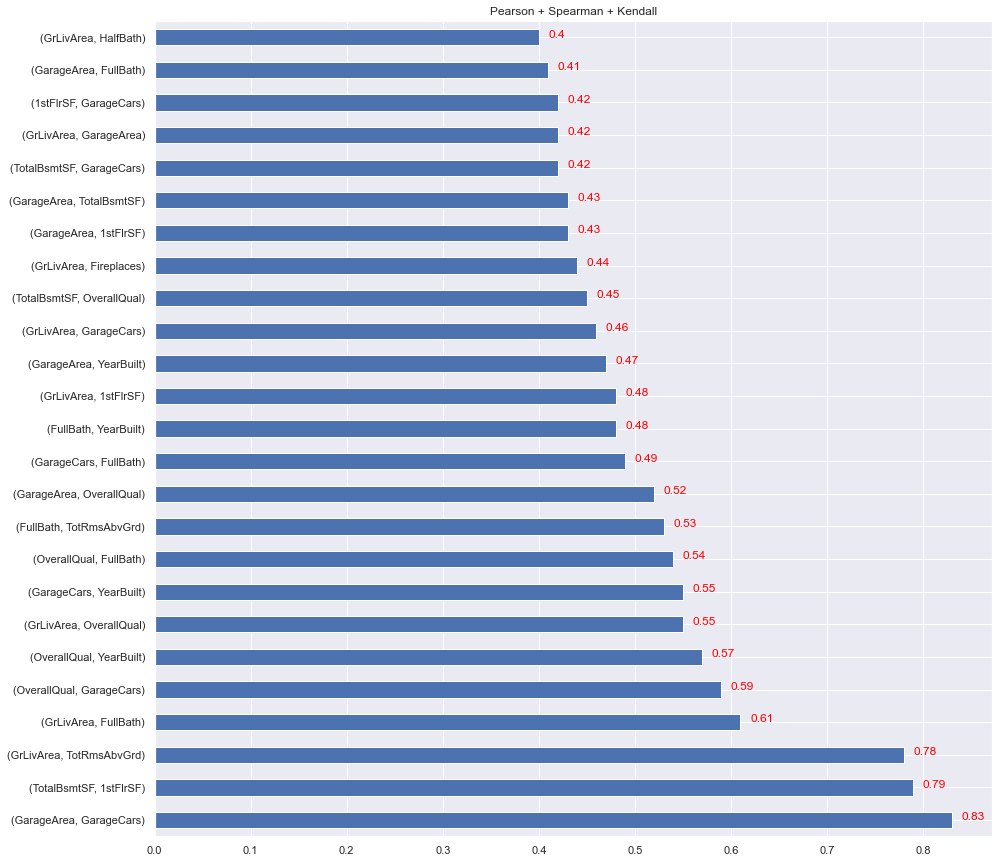

In [224]:
sns.set(style='darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
average_corr.plot.barh(ax=ax).set(title='Pearson + Spearman + Kendall')
for i, v in enumerate(average_corr[average_corr>0.3].values):
    ax.text(v+0.01, i, str(v), color='red')

#### valid Feature
>  GarageArea, GarageCars : 0.83
- GarageCars 제거.

>  TotalBsmtSF, 1stFlrSF : 0.79
- TotalBsmtSf : Total square feet of basement area
- 1stFlrSF : First Floor square feet
- 변수 하나로 합침.

> GrLivArea, TotRmsAbvGrd : 0.78
- TotRmsAbvGrd 제거

> OverallQual
- 전체적으로 변수들과 관련이 있음.
- 제거!

In [225]:
valid_numerical_columns.remove('GarageCars')
valid_discrete_columns.remove('GarageCars')
valid_numerical_columns.remove('TotRmsAbvGrd')
valid_discrete_columns.remove('TotRmsAbvGrd')
valid_numerical_columns.remove('OverallQual')
valid_discrete_columns.remove('OverallQual')

train_preprocessing_numerical['TotalSF'] = train_preprocessing_numerical['TotalBsmtSF'] + train_preprocessing_numerical['1stFlrSF']
valid_numerical_columns.remove('TotalBsmtSF')
valid_continuous_columns.remove('TotalBsmtSF')
valid_numerical_columns.remove('1stFlrSF')
valid_continuous_columns.remove('1stFlrSF')
train_preprocessing_numerical = train_preprocessing[valid_numerical_columns]

In [226]:
# 변수 처리하고 다시 vif 확인
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_preprocessing_numerical.values,i)
                     for i in range(train_preprocessing_numerical.shape[1])]
vif["features"] = train_preprocessing_numerical.columns
vif = vif.sort_values(by=['VIF Factor'], ascending=False)
vif

VIF Factor     features
0    25.821556    GrLivArea
7    17.193569     FullBath
8    14.184912    YearBuilt
1     9.126659   GarageArea
9     2.591678   Fireplaces
6     2.441674   BsmtFinSF1
4     2.399032      LotArea
10    2.058969     HalfBath
5     1.756967   WoodDeckSF
3     1.738660  OpenPorchSF
2     1.676809   MasVnrArea

### Valid Features

In [227]:
valid_discrete_columns

['FullBath', 'YearBuilt', 'Fireplaces', 'HalfBath']

In [228]:
valid_continuous_columns

['GrLivArea',
 'GarageArea',
 'MasVnrArea',
 'OpenPorchSF',
 'LotArea',
 'WoodDeckSF',
 'BsmtFinSF1']

In [229]:
valid_numerical_columns

['GrLivArea',
 'GarageArea',
 'MasVnrArea',
 'OpenPorchSF',
 'LotArea',
 'WoodDeckSF',
 'BsmtFinSF1',
 'FullBath',
 'YearBuilt',
 'Fireplaces',
 'HalfBath']

In [232]:
valid_categorical_columns

['SaleType',
 'Exterior1st',
 'FireplaceQu',
 'GarageCond',
 'LotConfig',
 'RoofStyle',
 'Foundation',
 'Electrical',
 'HouseStyle',
 'PavedDrive',
 'LandContour',
 'Alley',
 'RoofMatl',
 'BsmtExposure',
 'Heating',
 'MiscFeature',
 'GarageQual',
 'KitchenQual',
 'GarageFinish',
 'Neighborhood',
 'Condition2',
 'PoolQC',
 'BsmtFinType2',
 'BldgType',
 'MasVnrType',
 'Functional',
 'ExterCond',
 'Exterior2nd',
 'MSZoning',
 'ExterQual',
 'BsmtCond',
 'CentralAir',
 'Fence',
 'BsmtFinType1',
 'Condition1',
 'BsmtQual',
 'SaleCondition',
 'HeatingQC',
 'LotShape',
 'GarageType']

In [233]:
valid_columns = set(valid_numerical_columns) | set(valid_categorical_columns)
valid_columns

{'Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LotArea',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'OpenPorchSF',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'WoodDeckSF',
 'YearBuilt'}

In [236]:
print("valid_discrete_columns : ", len(valid_discrete_columns))
print("valid_continuous_columns : ",len(valid_continuous_columns))
print("valid_numerical_columns : ",len(valid_numerical_columns))
print("valid_categoricl_columns : ",len(valid_categorical_columns))
print("valid_columns : ",len(valid_columns))

valid_discrete_columns :  4
valid_continuous_columns :  7
valid_numerical_columns :  11
valid_categoricl_columns :  40
valid_columns :  51


In [238]:
train_preprocessing = train_preprocessing[valid_columns]